In [1]:
!pip install pandas scikit-learn statsmodels numpy matplotlib

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.metrics import pairwise_distances
import seaborn as sns



# Import des données 

In [10]:
participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

In [11]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" ))
rois_train["set"] = 'train'
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" ))
rois_test["set"] = 'test'
rois = pd.concat([rois_train, rois_test])

In [12]:
pd.set_option('display.max_columns', None)


In [13]:
rois.head(5)

,participant_id,session,run,TIV,CSF_Vol,GM_Vol,WM_Vol,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,lCau_GM_Vol,rCau_GM_Vol,lExtCbe_GM_Vol,rExtCbe_GM_Vol,lCbeWM_GM_Vol,rCbeWM_GM_Vol,lCbrWM_GM_Vol,rCbrWM_GM_Vol,lCSF_GM_Vol,rCSF_GM_Vol,lHip_GM_Vol,rHip_GM_Vol,lInfLatVen_GM_Vol,rInfLatVen_GM_Vol,lLatVen_GM_Vol,rLatVen_GM_Vol,lPal_GM_Vol,rPal_GM_Vol,lPut_GM_Vol,rPut_GM_Vol,lThaPro_GM_Vol,rThaPro_GM_Vol,lVenVen_GM_Vol,rVenVen_GM_Vol,lOC_GM_Vol,rOC_GM_Vol,lCbeLoCbe1-5_GM_Vol,rCbeLoCbe1-5_GM_Vol,lCbeLoCbe6-7_GM_Vol,rCbeLoCbe6-7_GM_Vol,lCbeLoCbe8-10_GM_Vol,rCbeLoCbe8-10_GM_Vol,lBasCbr+FobBr_GM_Vol,rBasCbr+FobBr_GM_Vol,lAntCinGy_GM_Vol,rAntCinGy_GM_Vol,lAntIns_GM_Vol,rAntIns_GM_Vol,lAntOrbGy_GM_Vol,rAntOrbGy_GM_Vol,lAngGy_GM_Vol,rAngGy_GM_Vol,lCal+Cbr_GM_Vol,rCal+Cbr_GM_Vol,lCenOpe_GM_Vol,rCenOpe_GM_Vol,lCun_GM_Vol,rCun_GM_Vol,lEnt_GM_Vol,rEnt_GM_Vol,lFroOpe_GM_Vol,rFroOpe_GM_Vol,lFroPo_GM_Vol,rFroPo_GM_Vol,lFusGy_GM_Vol,rFusGy_GM_Vol,lRecGy_GM_Vol,rRecGy_GM_Vol,lInfOccGy_GM_Vol,rInfOccGy_GM_Vol,lInfTemGy_GM_Vol,rInfTemGy_GM_Vol,lLinGy_GM_Vol,rLinGy_GM_Vol,lLatOrbGy_GM_Vol,rLatOrbGy_GM_Vol,lMidCinGy_GM_Vol,rMidCinGy_GM_Vol,lMedFroCbr_GM_Vol,rMedFroCbr_GM_Vol,lMidFroGy_GM_Vol,rMidFroGy_GM_Vol,lMidOccGy_GM_Vol,rMidOccGy_GM_Vol,lMedOrbGy_GM_Vol,rMedOrbGy_GM_Vol,lMedPoCGy_GM_Vol,rMedPoCGy_GM_Vol,lMedPrcGy_GM_Vol,rMedPrcGy_GM_Vol,lSupMedFroGy_GM_Vol,rSupMedFroGy_GM_Vol,lMidTemGy_GM_Vol,rMidTemGy_GM_Vol,lOccPo_GM_Vol,rOccPo_GM_Vol,lOccFusGy_GM_Vol,rOccFusGy_GM_Vol,lInfFroGy_GM_Vol,rInfFroGy_GM_Vol,lInfFroOrbGy_GM_Vol,rInfFroOrbGy_GM_Vol,lPosCinGy_GM_Vol,rPosCinGy_GM_Vol,lPCu_GM_Vol,rPCu_GM_Vol,lParHipGy_GM_Vol,rParHipGy_GM_Vol,lPosIns_GM_Vol,rPosIns_GM_Vol,lParOpe_GM_Vol,rParOpe_GM_Vol,lPoCGy_GM_Vol,rPoCGy_GM_Vol,lPosOrbGy_GM_Vol,rPosOrbGy_GM_Vol,lPla_GM_Vol,rPla_GM_Vol,lPrcGy_GM_Vol,rPrcGy_GM_Vol,lTem_GM_Vol,rTem_GM_Vol,lSCA_GM_Vol,rSCA_GM_Vol,lSupFroGy_GM_Vol,rSupFroGy_GM_Vol,lCbr+Mot_GM_Vol,rCbr+Mot_GM_Vol,lSupMarGy_GM_Vol,rSupMarGy_GM_Vol,lSupOccGy_GM_Vol,rSupOccGy_GM_Vol,lSupParLo_GM_Vol,rSupParLo_GM_Vol,lSupTemGy_GM_Vol,rSupTemGy_GM_Vol,lTemPo_GM_Vol,rTemPo_GM_Vol,lInfFroAngGy_GM_Vol,rInfFroAngGy_GM_Vol,lTemTraGy_GM_Vol,rTemTraGy_GM_Vol,l3thVen_CSF_Vol,r3thVen_CSF_Vol,l4thVen_CSF_Vol,r4thVen_CSF_Vol,lAcc_CSF_Vol,rAcc_CSF_Vol,lAmy_CSF_Vol,rAmy_CSF_Vol,lBst_CSF_Vol,rBst_CSF_Vol,lCau_CSF_Vol,rCau_CSF_Vol,lExtCbe_CSF_Vol,rExtCbe_CSF_Vol,lCbeWM_CSF_Vol,rCbeWM_CSF_Vol,lCbrWM_CSF_Vol,rCbrWM_CSF_Vol,lCSF_CSF_Vol,rCSF_CSF_Vol,lHip_CSF_Vol,rHip_CSF_Vol,lInfLatVen_CSF_Vol,rInfLatVen_CSF_Vol,lLatVen_CSF_Vol,rLatVen_CSF_Vol,lPal_CSF_Vol,rPal_CSF_Vol,lPut_CSF_Vol,rPut_CSF_Vol,lThaPro_CSF_Vol,rThaPro_CSF_Vol,lVenVen_CSF_Vol,rVenVen_CSF_Vol,lOC_CSF_Vol,rOC_CSF_Vol,lCbeLoCbe1-5_CSF_Vol,rCbeLoCbe1-5_CSF_Vol,lCbeLoCbe6-7_CSF_Vol,rCbeLoCbe6-7_CSF_Vol,lCbeLoCbe8-10_CSF_Vol,rCbeLoCbe8-10_CSF_Vol,lBasCbr+FobBr_CSF_Vol,rBasCbr+FobBr_CSF_Vol,lAntCinGy_CSF_Vol,rAntCinGy_CSF_Vol,lAntIns_CSF_Vol,rAntIns_CSF_Vol,lAntOrbGy_CSF_Vol,rAntOrbGy_CSF_Vol,lAngGy_CSF_Vol,rAngGy_CSF_Vol,lCal+Cbr_CSF_Vol,rCal+Cbr_CSF_Vol,lCenOpe_CSF_Vol,rCenOpe_CSF_Vol,lCun_CSF_Vol,rCun_CSF_Vol,lEnt_CSF_Vol,rEnt_CSF_Vol,lFroOpe_CSF_Vol,rFroOpe_CSF_Vol,lFroPo_CSF_Vol,rFroPo_CSF_Vol,lFusGy_CSF_Vol,rFusGy_CSF_Vol,lRecGy_CSF_Vol,rRecGy_CSF_Vol,lInfOccGy_CSF_Vol,rInfOccGy_CSF_Vol,lInfTemGy_CSF_Vol,rInfTemGy_CSF_Vol,lLinGy_CSF_Vol,rLinGy_CSF_Vol,lLatOrbGy_CSF_Vol,rLatOrbGy_CSF_Vol,lMidCinGy_CSF_Vol,rMidCinGy_CSF_Vol,lMedFroCbr_CSF_Vol,rMedFroCbr_CSF_Vol,lMidFroGy_CSF_Vol,rMidFroGy_CSF_Vol,lMidOccGy_CSF_Vol,rMidOccGy_CSF_Vol,lMedOrbGy_CSF_Vol,rMedOrbGy_CSF_Vol,lMedPoCGy_CSF_Vol,rMedPoCGy_CSF_Vol,lMedPrcGy_CSF_Vol,rMedPrcGy_CSF_Vol,lSupMedFroGy_CSF_Vol,rSupMedFroGy_CSF_Vol,lMidTemGy_CSF_Vol,rMidTemGy_CSF_Vol,lOccPo_CSF_Vol,rOccPo_CSF_Vol,lOccFusGy_CSF_Vol,rOccFusGy_CSF_Vol,lInfFroGy_CSF_Vol,rInfFroGy_CSF_Vol,lInfFroOrbGy_CSF_Vol,rInfFroOrbGy_CSF_Vol,lPosCinGy_CSF_Vol,rPosCinGy_CSF_Vol,lPCu_CSF_Vol,rPCu_CSF_Vol,lPar

# Exploration

## Préliminaire

Les plus grosses différences en termes de distribution : 
CSF_Vol
lMidFroGy_GM_Vol
lTemPo_CSF_Vol
rTemPo_CSF_Vol
rThaPro_GM_Vol
rThaPro_GM_Vol
rLinGy_CSF_Vol
rLatVen_CSF_Vol


lAntIns_CSF_Vol
rAntIns_CSF_Vol
lAntCinGy_CSF_Vol
lMedFroCbr_CSF_Vol
lPosIns_CSF_Vol
rPosIns_CSF_Vol
lFroOpe_CSF_Vol
lTemTraGy_CSF_Vol
rMedFroCbr_CSF_Vol
rPla_CSF_Vol
rFroOpe_CSF_Vol
rAntCinGy_CSF_Vol
lPla_CSF_Vol

In [6]:
rois_train.head(5)

,participant_id,session,run,TIV,CSF_Vol,GM_Vol,WM_Vol,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,...,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol,set
0,CH7098a,V1,1,1712.357084,375.529152,747.089338,586.391159,0.063950,0.058779,0.062019,...,8.622047,2.465118,2.656249,6.584050,6.213031,1.787291,2.043806,0.406808,0.403986,train
1,A00024535,V1,1,1700.601735,399.493745,721.128411,579.446172,0.047534,0.044989,0.053391,...,8.544778,2.439144,2.533854,6.849889,6.730247,1.945829,2.325559,0.312825,0.426095,train
2,CC7563,V1,1,1449.327365,220.825294,661.028439,566.500051,0.118209,0.088380,0.069014,...,4.258448,1.394717,1.773845,3.537319,3.663182,1.007794,0.856915,0.162711,0.193604,train
3,CC3945,V1,1,1184.699000,201.579922,560.051329,423.016129,0.102882,0.084044,0.044932,...,3.383453,1.346163,1.897148,3.623939,3.865042,1.237802,1.206910,0.218570,0.204934,train
4,CH8853b,V1,1,1518.198466,291.544632,705.384606,520.807601,0.067550,0.065347,0.047114,...,7.043181,2.161728,2.069372,3.730283,4.239948,1.418323,1.626568,0.278396,0.292313,train


In [7]:
schizophrenia_indices = participants.index[participants['diagnosis'] == 'schizophrenia'].tolist()
control_indices = participants.index[participants['diagnosis'] == 'control'].tolist()


In [ ]:
columns_to_analyze = rois.columns[3:291]
mean_diff_percentage = {}

for col in columns_to_analyze:
    # Moyenne des schizophrènes
    mean_schizophrenia = rois.loc[schizophrenia_indices, col].mean()
    # Moyenne des contrôles
    mean_control = rois.loc[control_indices, col].mean()
    
    # Calcul de la différence en pourcentage
    if mean_control != 0:  # Eviter la division par zéro
        diff_percentage = abs(mean_schizophrenia - mean_control) / mean_control * 100
    else:
        diff_percentage = float('inf')  # Si la moyenne des contrôles est 0, on peut attribuer une valeur infinie
    
    mean_diff_percentage[col] = diff_percentage

# Trier les différences en pourcentage par ordre décroissant
sorted_mean_diff_percentage = sorted(mean_diff_percentage.items(), key=lambda x: x[1], reverse=True)

# Prendre les 20 premières colonnes avec la plus grande différence en pourcentage
top_20_columns = sorted_mean_diff_percentage[:20]
columns = [col for col, diff in top_20_columns]

# Afficher les 20 premières colonnes et leurs différences en pourcentage
for col, diff in top_20_columns:
    print(f"{col}: {diff:.2f}%")

# Affichage des histogrammes pour les variables sélectionnées
for col in columns:
    # Si la colonne est catégorielle (par exemple, 'sex', 'session', 'study', 'site', 'set')
    if rois[col].dtype == 'object' or rois[col].dtype.name == 'category':
        plt.figure(figsize=(10,6))
        
        # Tracer un bar plot pour les variables catégorielles
        plt.hist([rois.loc[control_indices, col], rois.loc[schizophrenia_indices, col]], 
                 bins=len(rois[col].unique()), alpha=0.5, label=['Control', 'Schizophrenia'], color=['blue', 'red'])
        
        # Ajouter des titres et labels
        plt.title(f'Distribution de {col} selon le diagnostic')
        plt.xlabel(col)
        plt.ylabel('Nombre de Participants')
        plt.legend(title='Groupes', loc='upper right')
        plt.show()

    elif rois[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10,6))

        # Tracer des histogrammes pour les variables numériques
        plt.hist(rois.loc[control_indices, col], bins=20, alpha=0.5, label='Control', color='blue')
        plt.hist(rois.loc[schizophrenia_indices, col], bins=20, alpha=0.5, label='Schizophrenia', color='red')
        
        # Ajouter des titres et labels
        plt.title(f'Distribution de {col} selon le diagnostic')
        plt.xlabel(col)
        plt.ylabel('Nombre de Participants')
        plt.legend(title='Groupes', loc='upper right')
        plt.show()


## Réduction de dimension

In [ ]:
# 1. Variables liées à l'identification des participants et sessions
identification_columns = [0, 1, 2, 3]

# 2. Variables Frontal (Fro)
frontal_columns_gm = [15, 16, 17, 18]
frontal_columns_csf = [90, 91, 92, 93]
frontal_columns_wm = [180, 181, 182, 183]

# 3. Variables Temporal (Tem)
temporal_columns_gm = [19, 20, 21, 22]
temporal_columns_csf = [94, 95, 96, 97]
temporal_columns_wm = [184, 185, 186, 187]

# 4. Variables Occipital (Occ)
occipital_columns_gm = [23, 24, 25, 26]
occipital_columns_csf = [98, 99, 100, 101]
occipital_columns_wm = [188, 189, 190, 191]

# 5. Variables Parietal (Par)
parietal_columns_gm = [27, 28, 29, 30]
parietal_columns_csf = [102, 103, 104, 105]
parietal_columns_wm = [192, 193, 194, 195]

# 6. Variables Cerebellum (Cbe)
cerebellum_columns_gm = [31, 32, 33, 34]
cerebellum_columns_csf = [106, 107, 108, 109]
cerebellum_columns_wm = [196, 197, 198, 199]

# 7. Variables Subcortical (Sub)
subcortical_columns_gm = [35, 36, 37, 38, 39, 40]
subcortical_columns_csf = [110, 111, 112, 113, 114, 115]
subcortical_columns_wm = [200, 201, 202, 203, 204, 205]

# 8. Variables Thalamus
thalamus_columns_gm = [41, 42]
thalamus_columns_csf = [116, 117]
thalamus_columns_wm = [206, 207]

# 9. Variables Lingual
lingual_columns_gm = [43, 44]
lingual_columns_csf = [118, 119]
lingual_columns_wm = [208, 209]

# Stocker tous les indices dans un dictionnaire pour une utilisation facile
brain_regions_indices = {
    "identification": identification_columns,
    "frontal_gm": frontal_columns_gm,
    "frontal_csf": frontal_columns_csf,
    "frontal_wm": frontal_columns_wm,
    "temporal_gm": temporal_columns_gm,
    "temporal_csf": temporal_columns_csf,
    "temporal_wm": temporal_columns_wm,
    "occipital_gm": occipital_columns_gm,
    "occipital_csf": occipital_columns_csf,
    "occipital_wm": occipital_columns_wm,
    "parietal_gm": parietal_columns_gm,
    "parietal_csf": parietal_columns_csf,
    "parietal_wm": parietal_columns_wm,
    "cerebellum_gm": cerebellum_columns_gm,
    "cerebellum_csf": cerebellum_columns_csf,
    "cerebellum_wm": cerebellum_columns_wm,
    "subcortical_gm": subcortical_columns_gm,
    "subcortical_csf": subcortical_columns_csf,
    "subcortical_wm": subcortical_columns_wm,
    "thalamus_gm": thalamus_columns_gm,
    "thalamus_csf": thalamus_columns_csf,
    "thalamus_wm": thalamus_columns_wm,
    "lingual_gm": lingual_columns_gm,
    "lingual_csf": lingual_columns_csf,
    "lingual_wm": lingual_columns_wm,
}

# Afficher les indices par groupe de régions
for region, indices in brain_regions_indices.items():
    print(f"{region}: {indices}")


Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


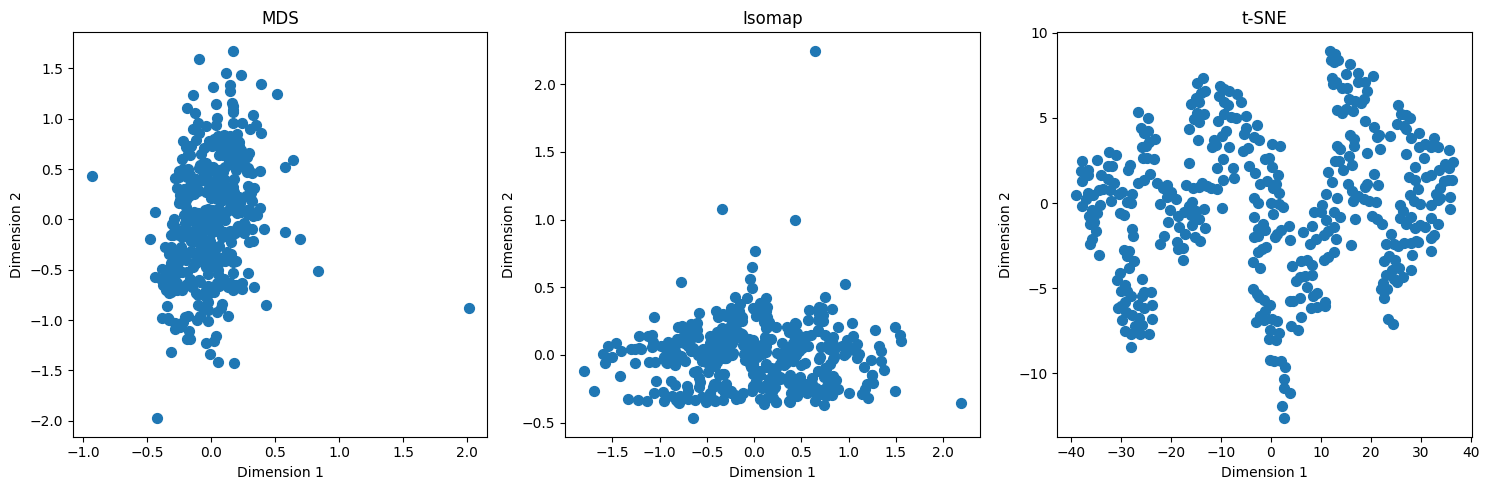

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


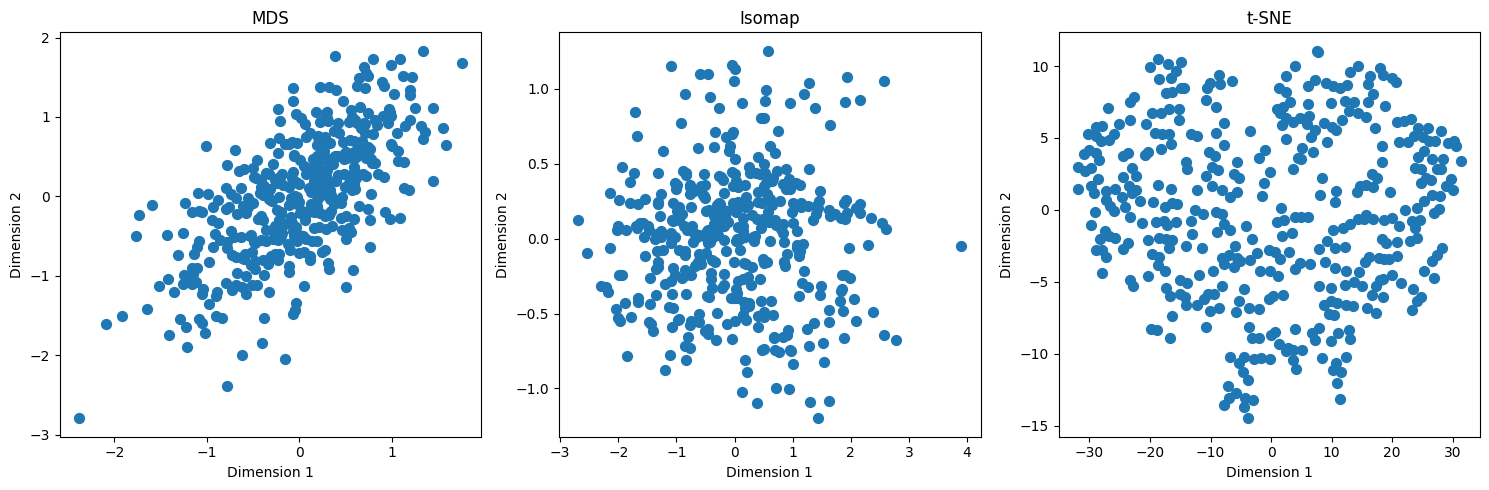

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


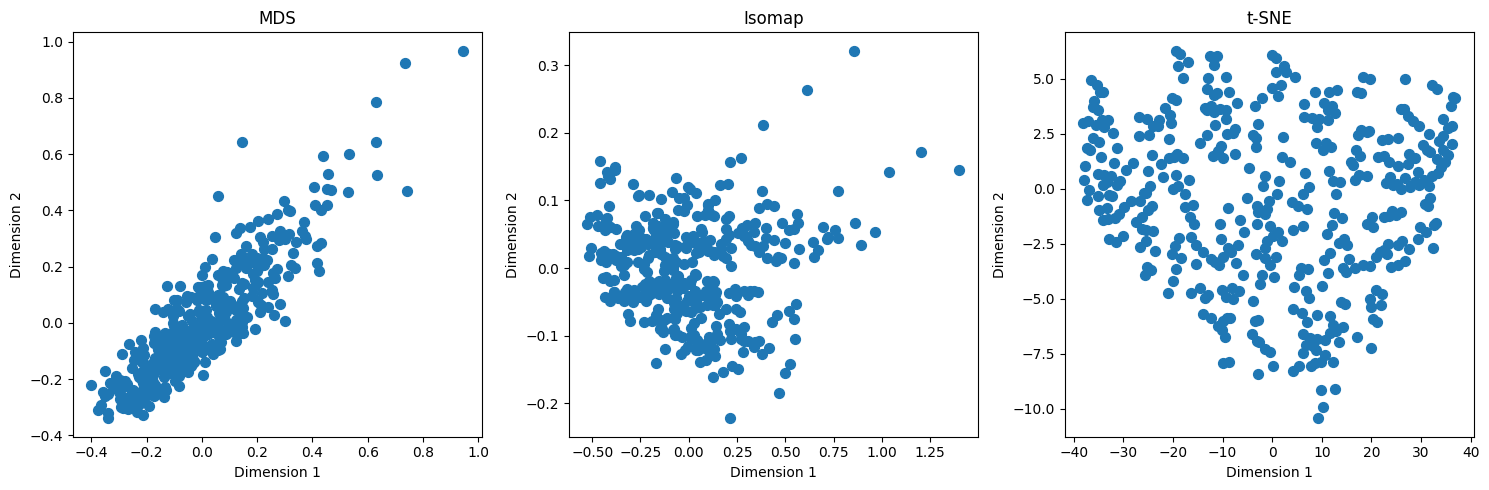

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


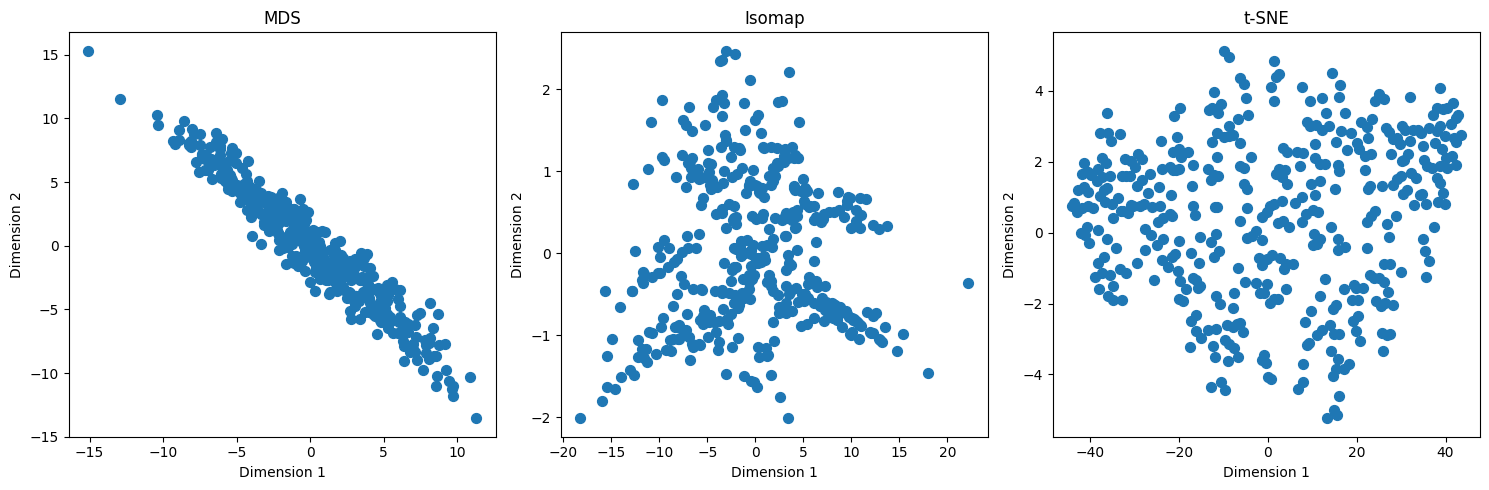

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


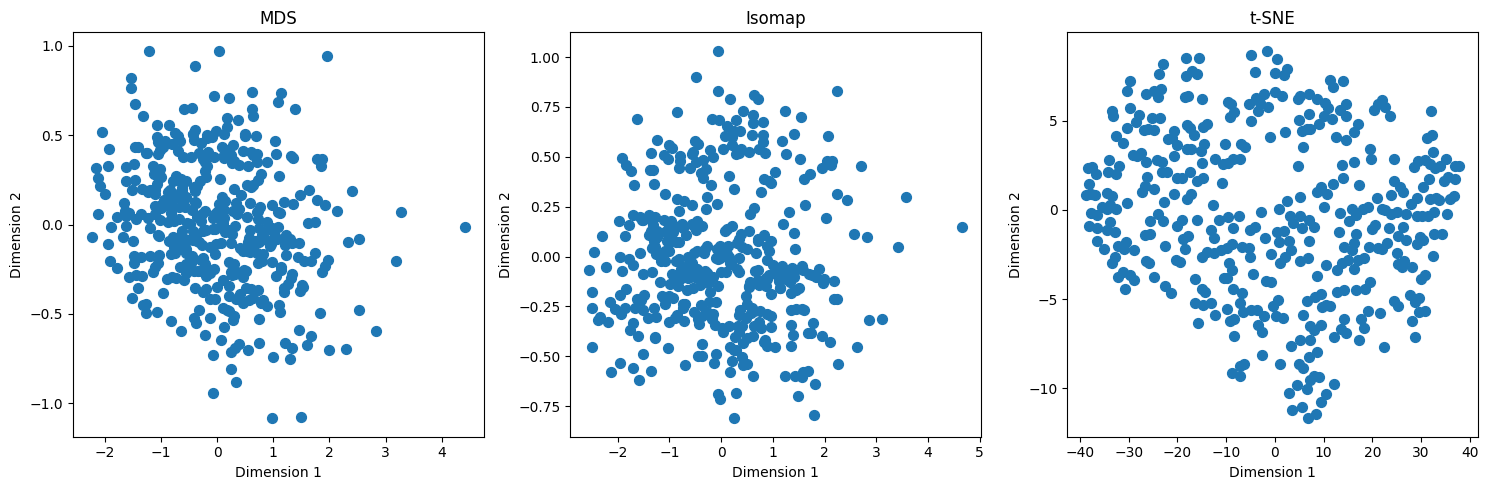

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


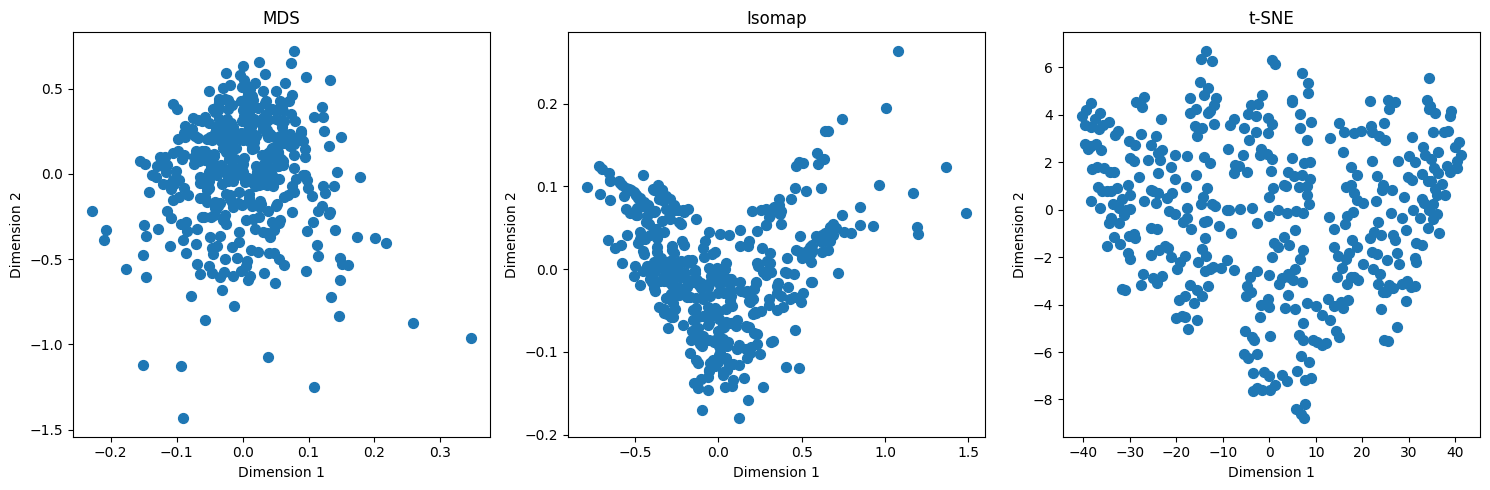

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


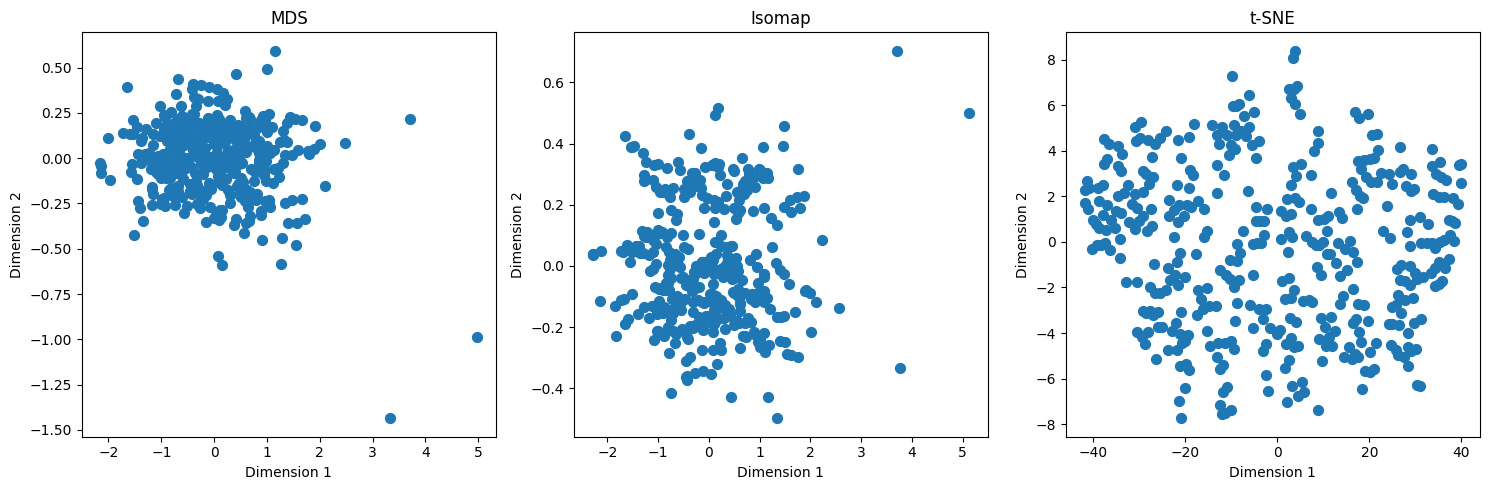

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


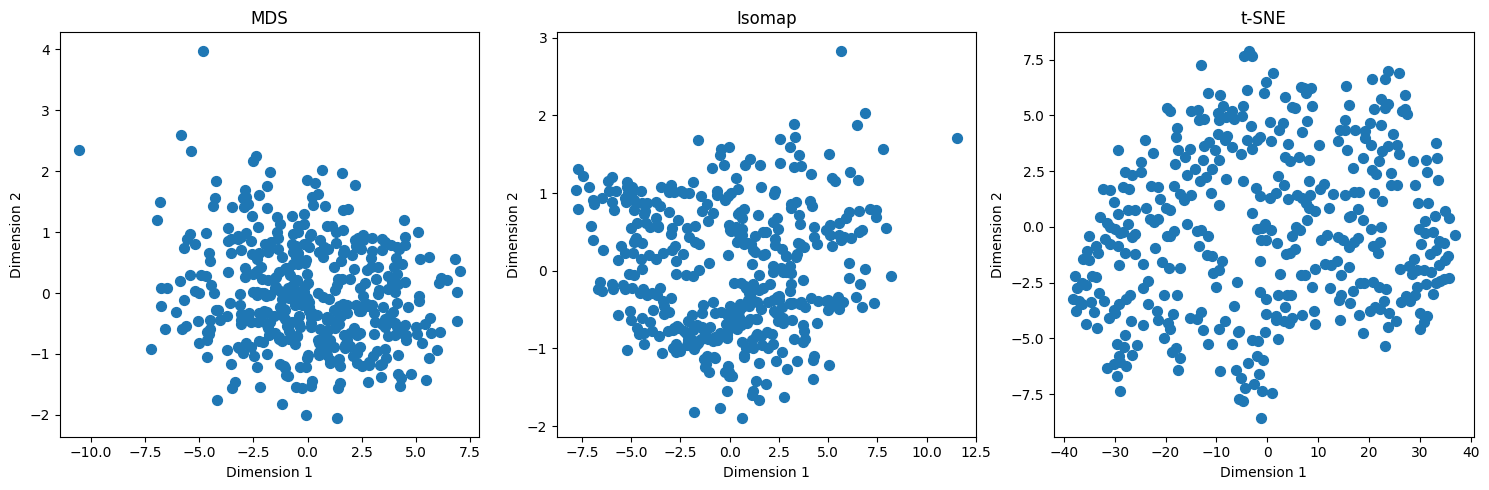

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


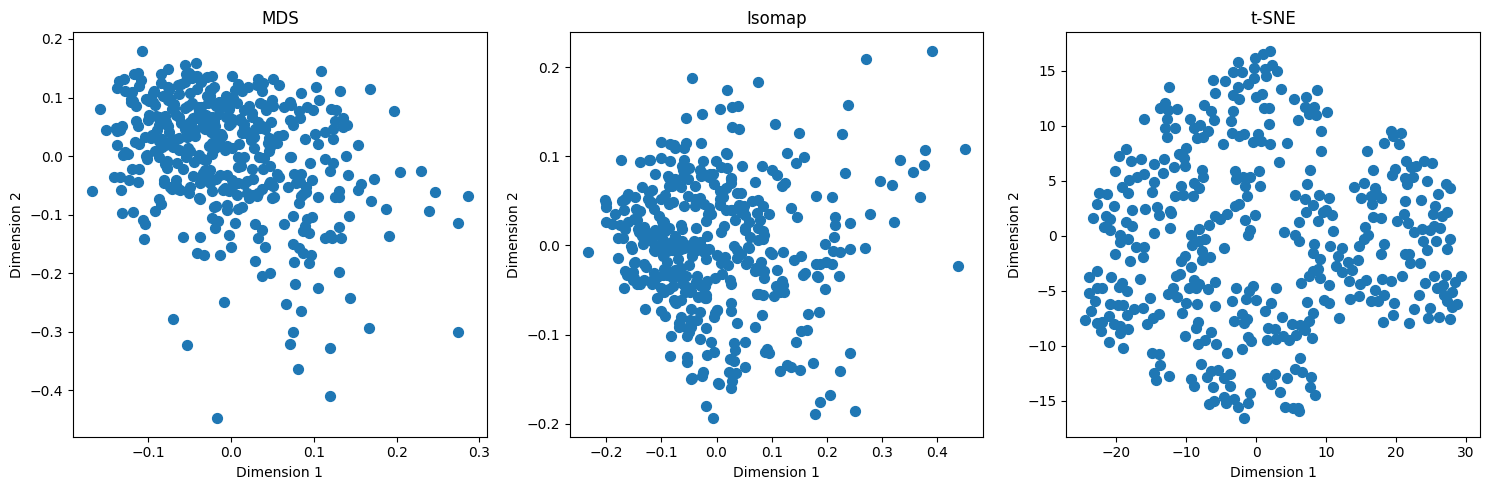

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


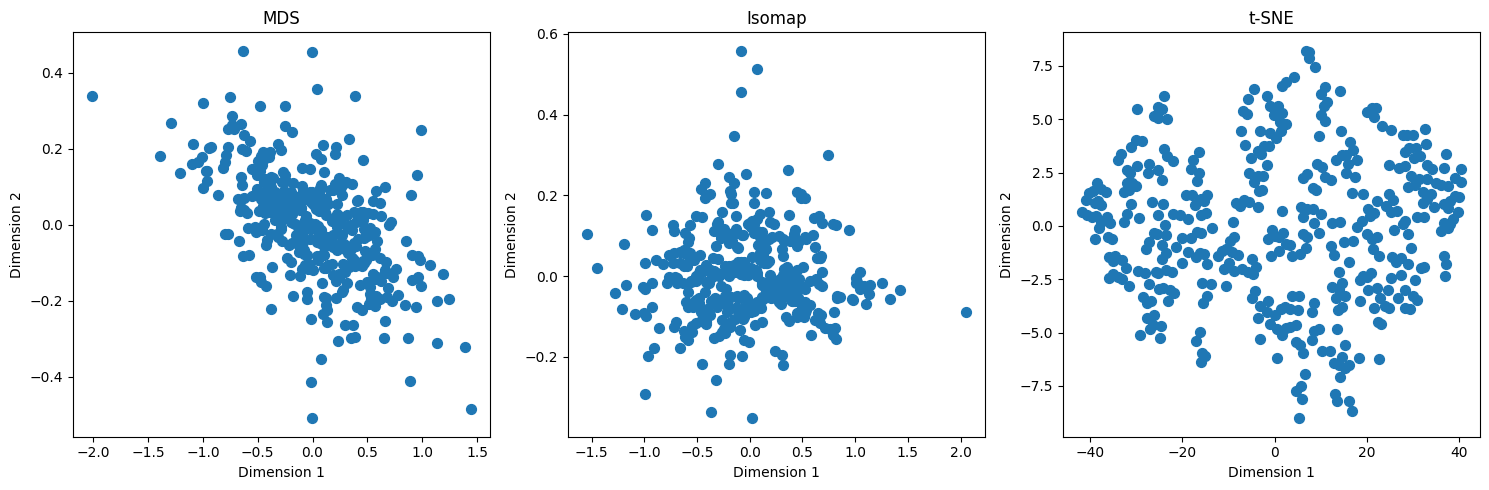

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


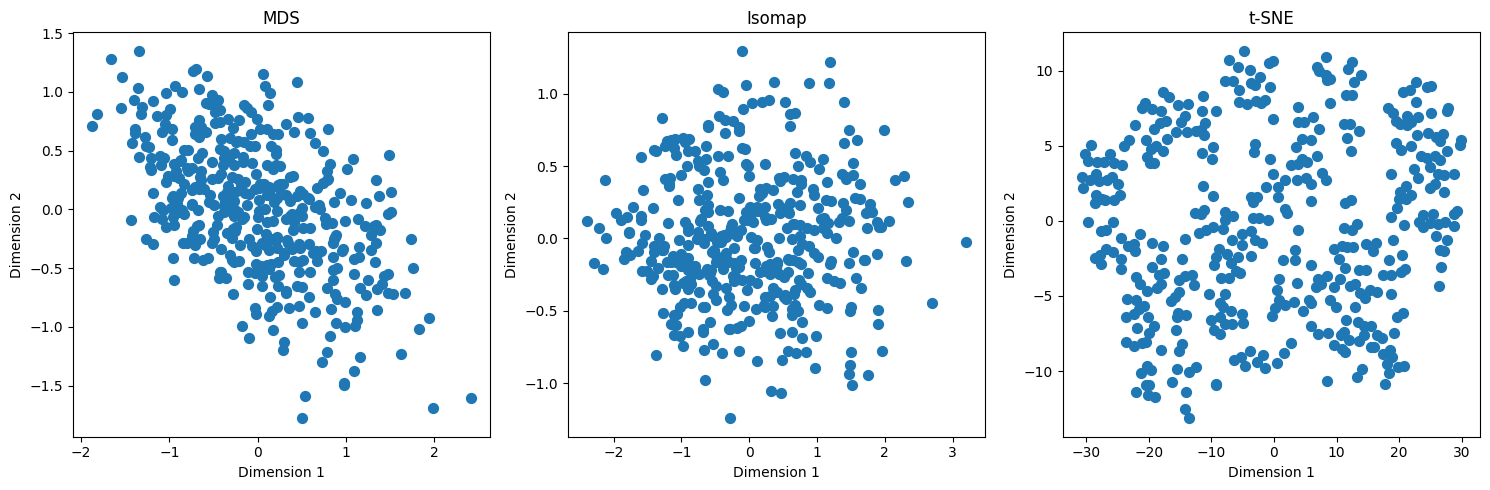

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


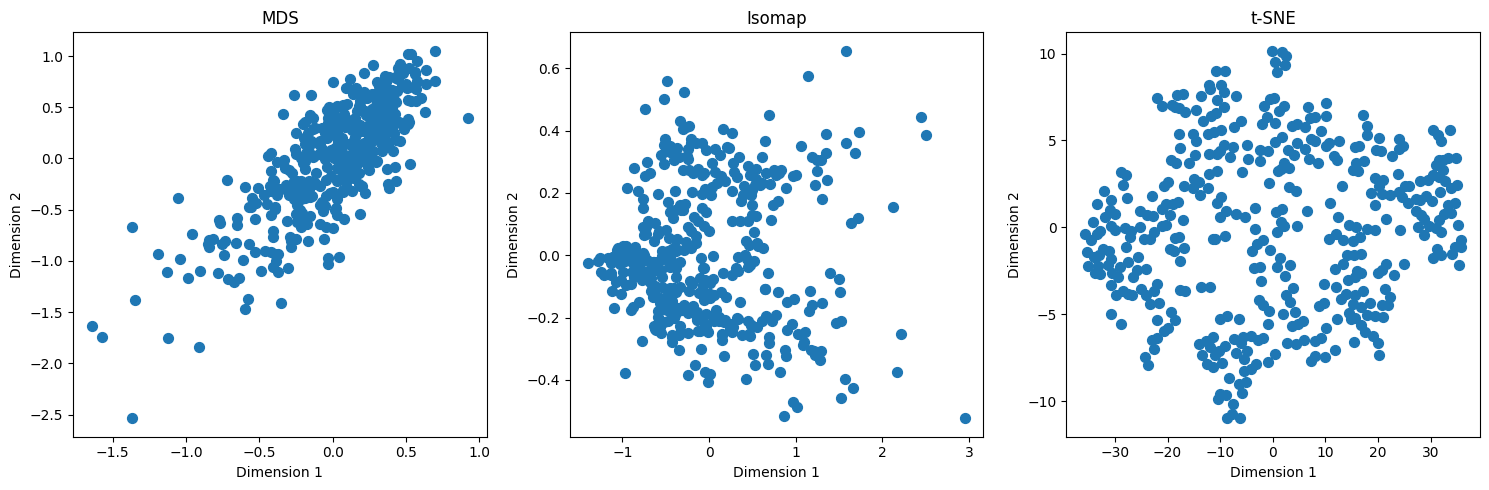

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


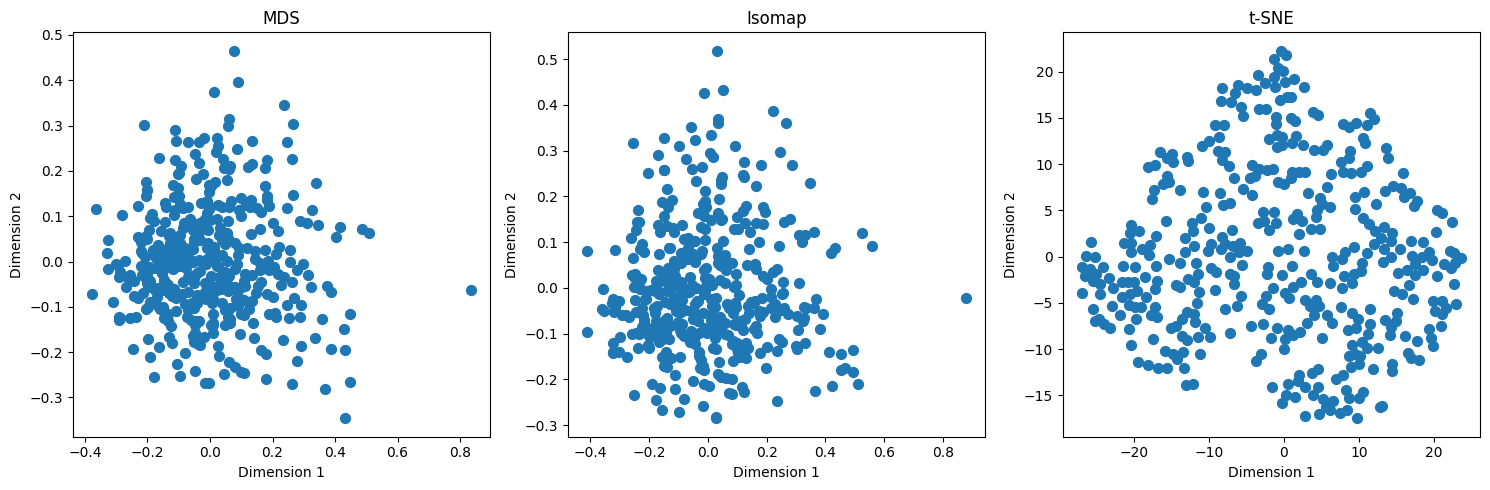

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


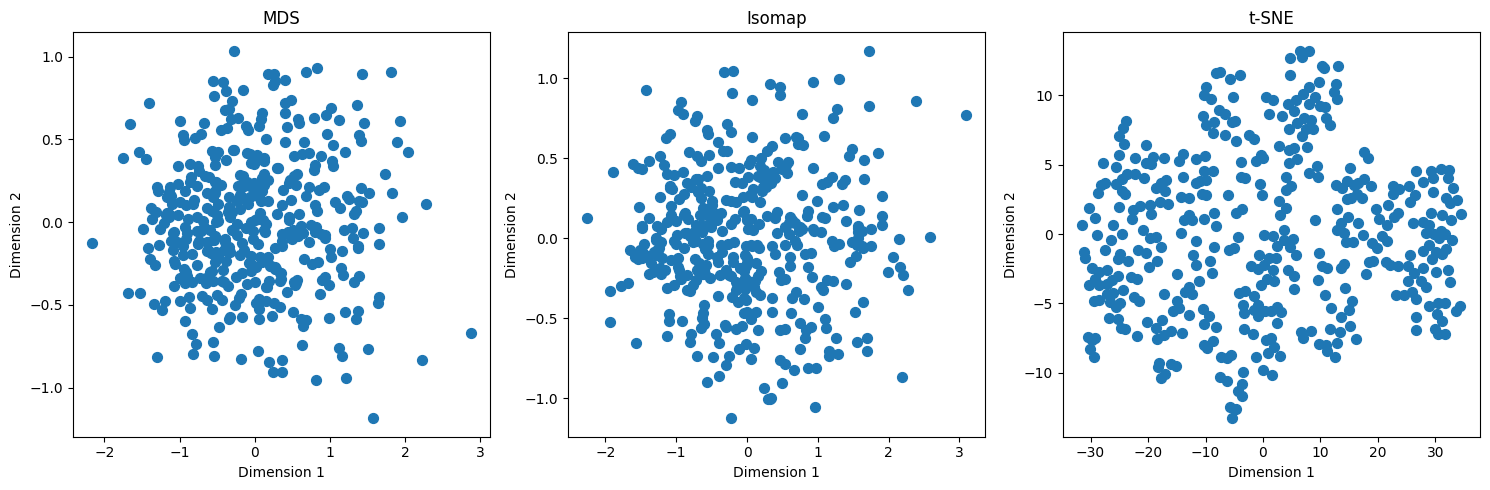

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


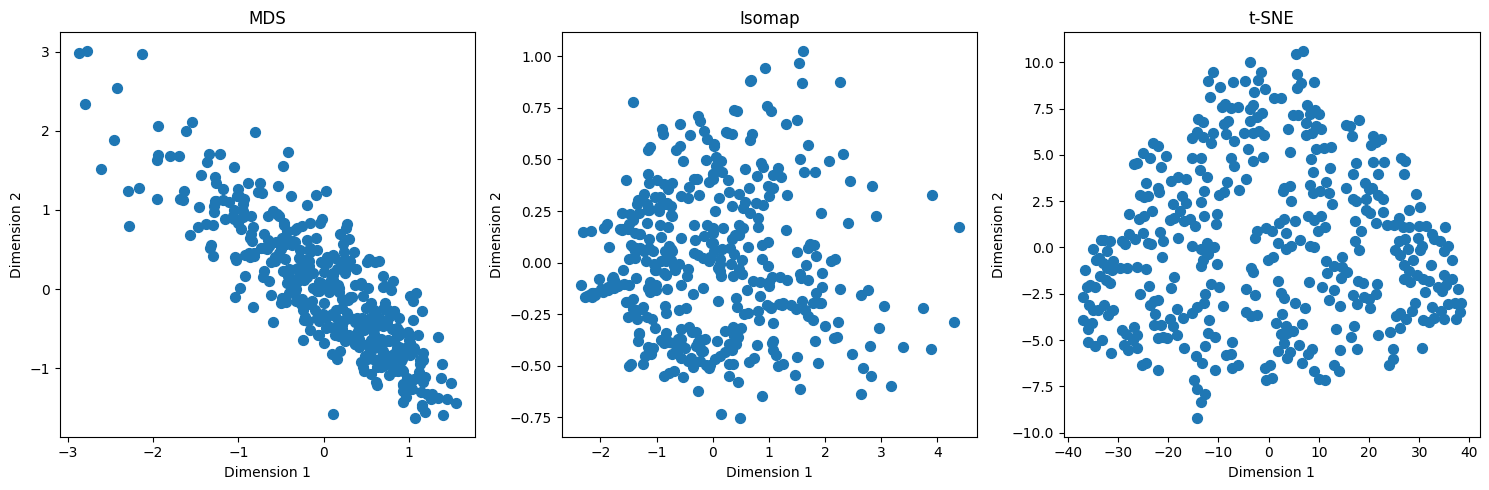

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


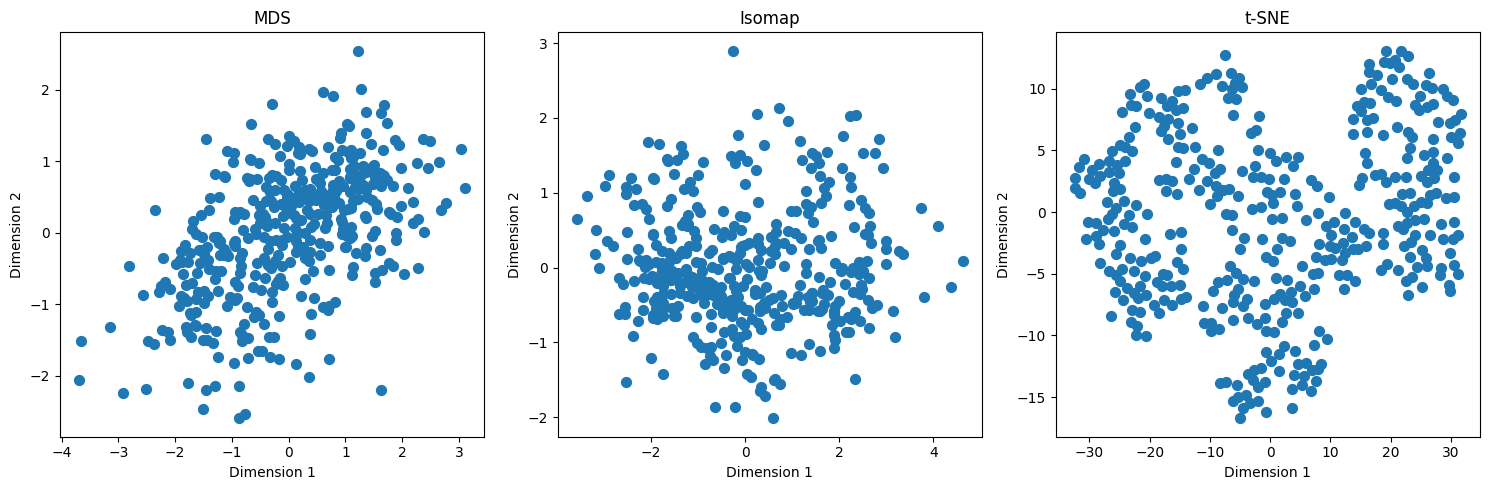

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


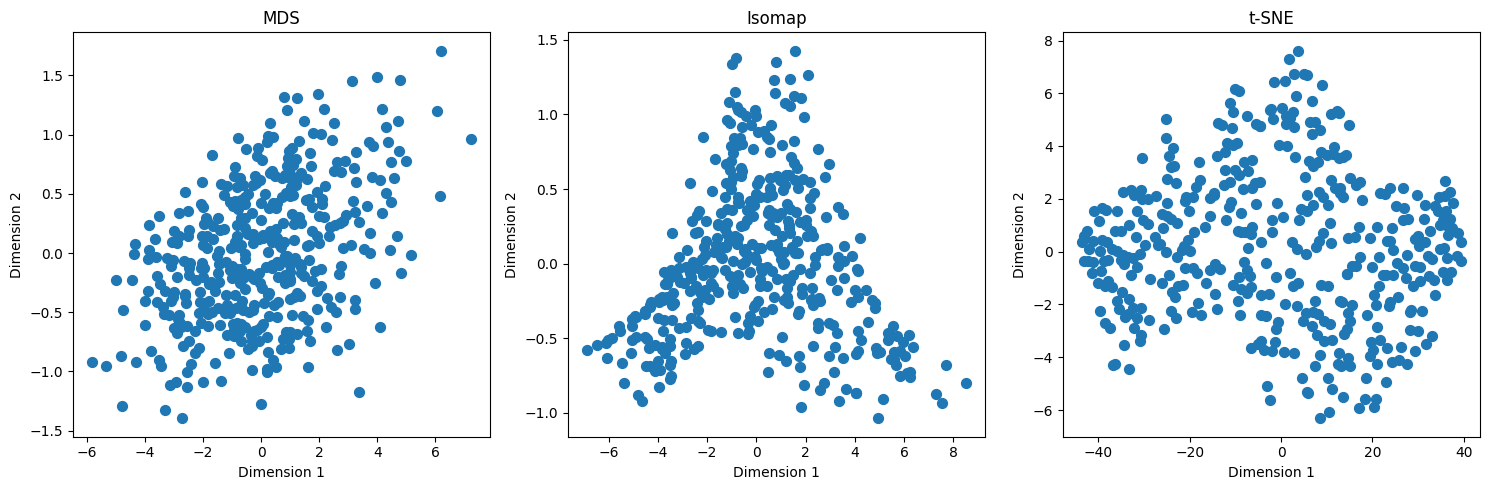

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


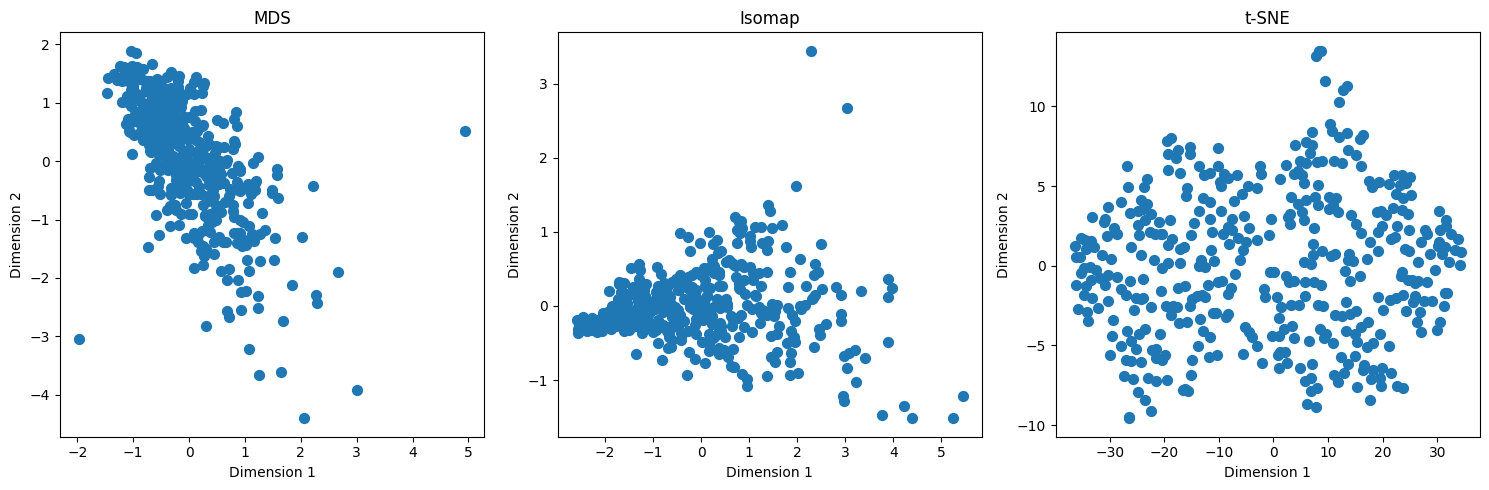

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


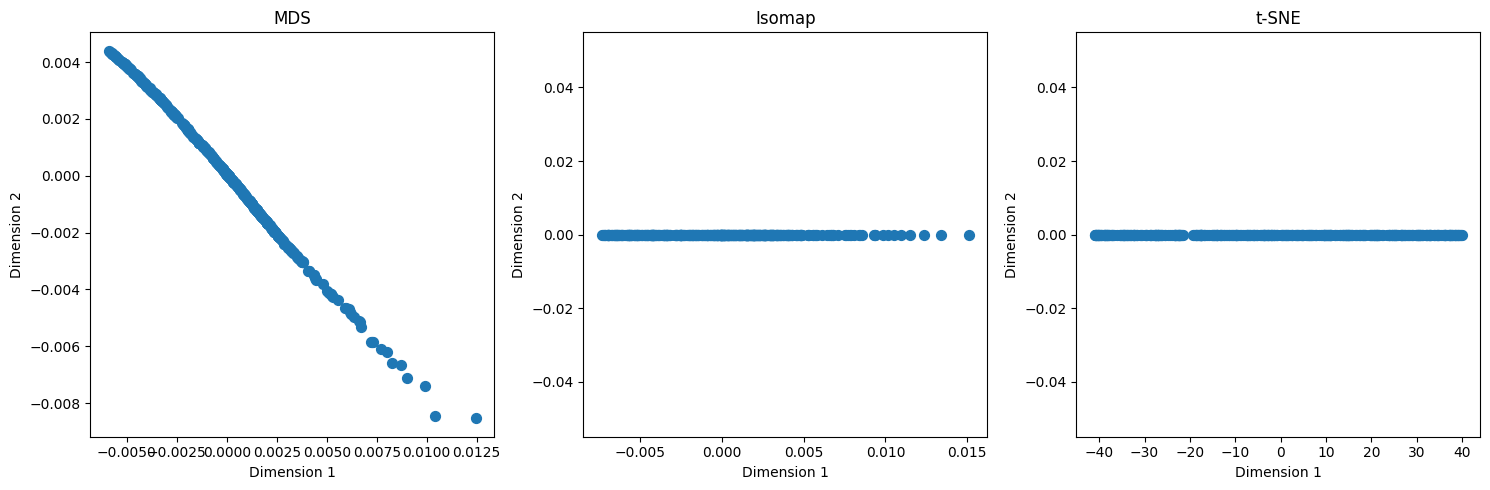

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


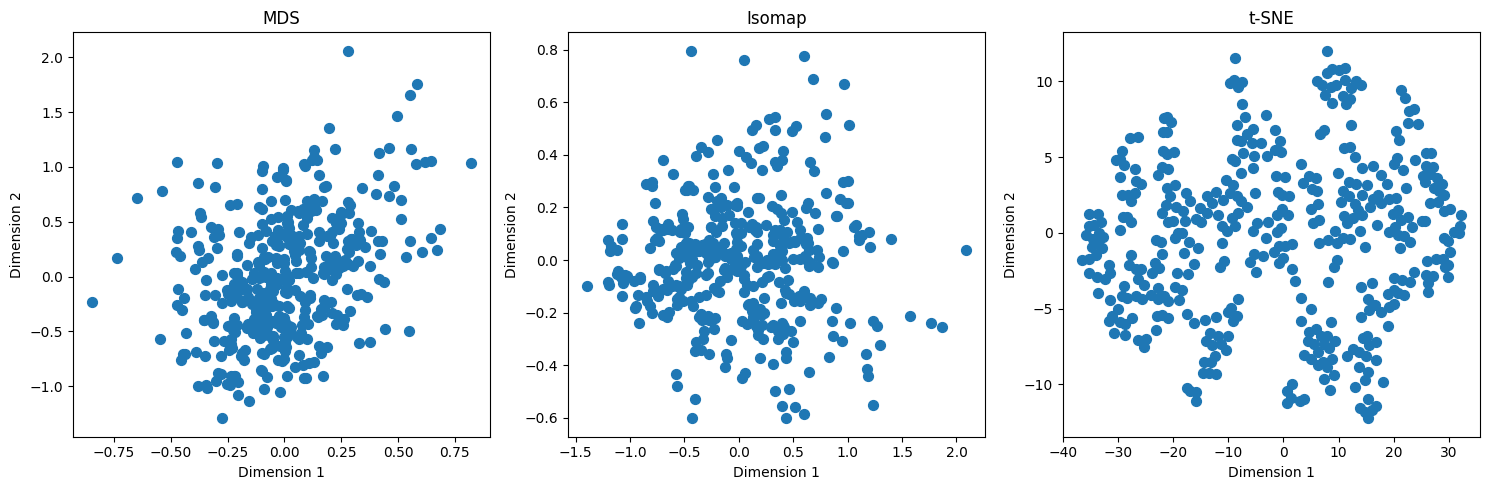

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


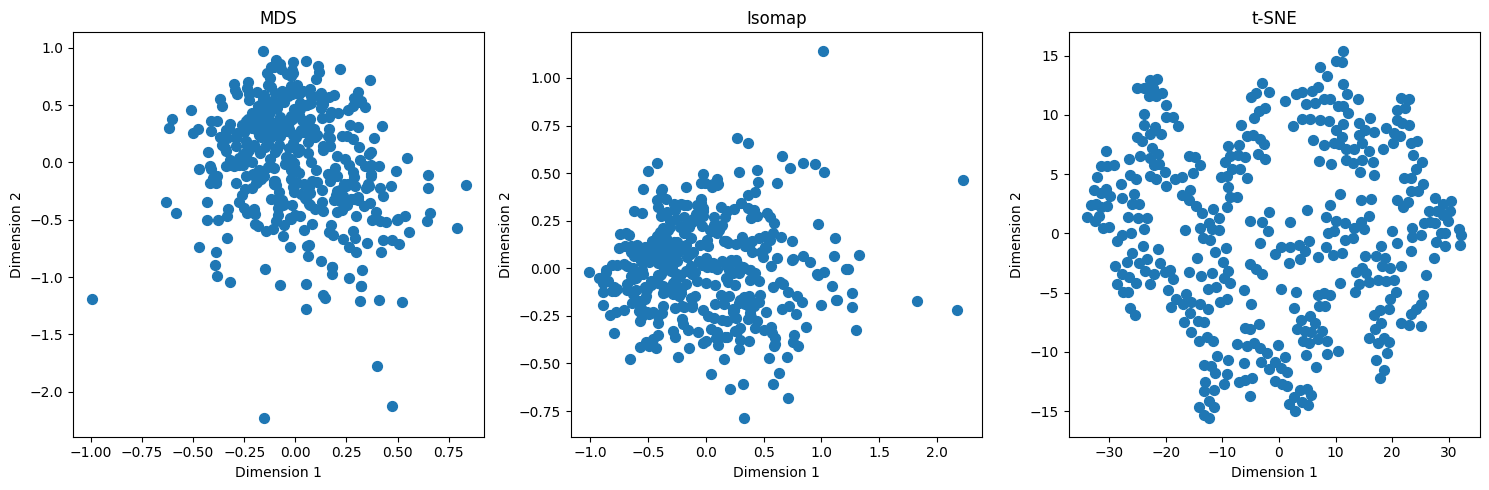

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


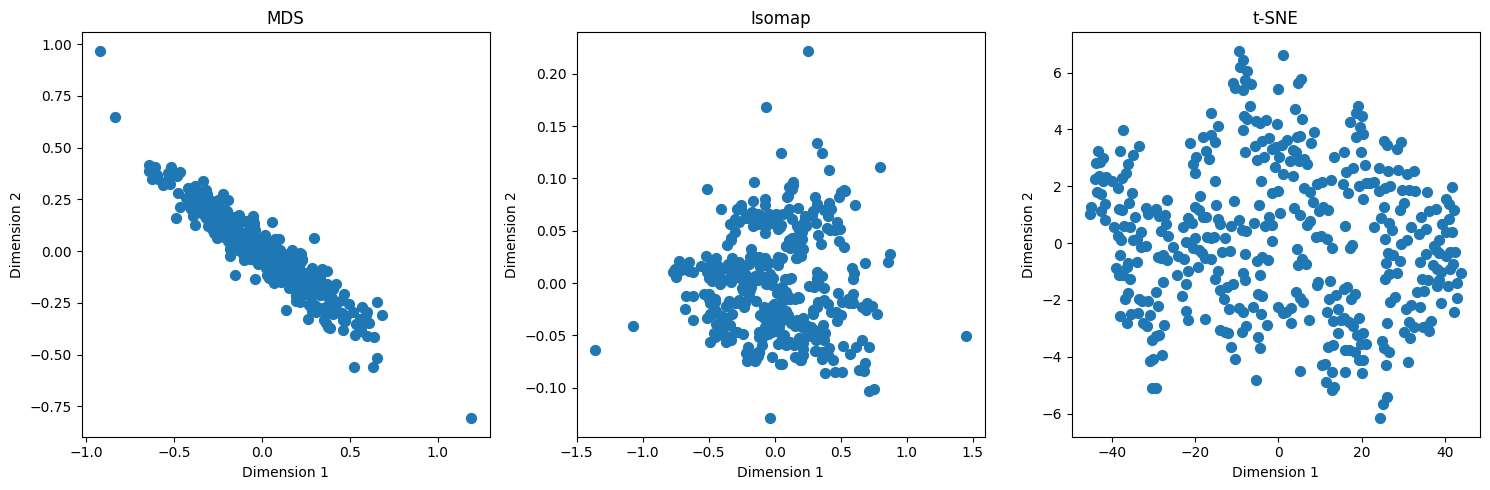

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


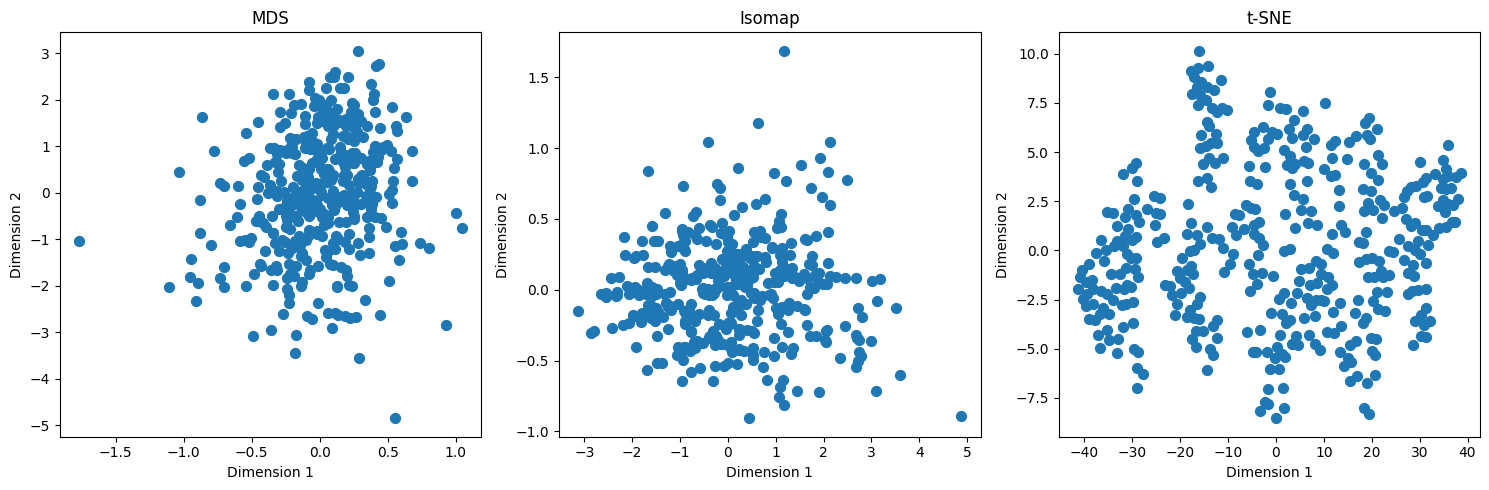

Shape de la matrice de dissimilarité : (410, 410)


C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


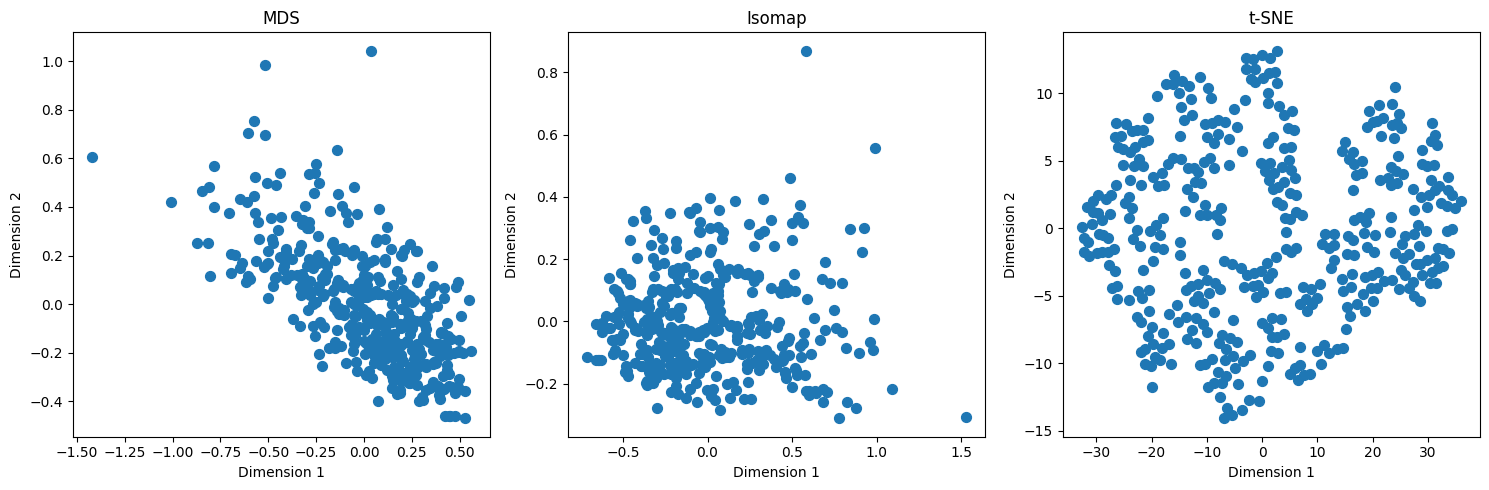

In [151]:
for partie_du_cerveau in list(brain_regions_indices.values())[1:] : 
        rois_to_reduce_dimension = rois_train.iloc[:, partie_du_cerveau]
        D = compute_dissimilarity_matrix(rois_to_reduce_dimension)
        print("Shape de la matrice de dissimilarité :", D.shape)
        X_isomap = apply_isomap(rois_to_reduce_dimension)
        X_mds = apply_mds(D)
        X_mds_rotated = rotate_and_flip(X_mds)
        try:
                X_tsne = apply_tsne(rois_to_reduce_dimension)
        except KeyboardInterrupt:
                print("t-SNE interrompu automatiquement.")
                X_tsne = None
    
        if X_tsne is not None:
                plot_comparison([X_mds, X_isomap, X_tsne], ["MDS", "Isomap", "t-SNE"])
        else:
                plot_comparison([X_mds, X_isomap], ["MDS", "Isomap"])

Le but est de trouver l'atrophie.

### Multi-dimensional Scaling (MDS)

MDS tente de trouver des projections de dimension K des observation, concaténés dans une matrice de sorte que dij ≈ ‖xi −xj‖ soient aussi proches que possible.

In [130]:

def compute_dissimilarity_matrix(data, metric='euclidean'):
    """Calcule la matrice de dissimilarité avec une métrique donnée."""
    return pairwise_distances(data, metric=metric)

def apply_mds(dissimilarity_matrix, n_components=2, random_state=40):
    """Applique MDS sur une matrice de dissimilarité."""
    mds = MDS(dissimilarity='precomputed', n_components=n_components, random_state=random_state, max_iter=3000, eps=1e-9)
    return mds.fit_transform(dissimilarity_matrix)

def rotate_and_flip(data, theta_degrees=80):
    """Applique une rotation et un retournement sur des données en 2D."""
    theta = theta_degrees * np.pi / 180.0
    rot = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
    data_rotated = np.dot(data, rot)
    data_rotated[:, 0] *= -1
    return data_rotated

def plot_2d(data, title="Projection des données", labels=None):
    """Trace des données en 2D avec des étiquettes facultatives."""
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=50)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.text(data[i, 0], data[i, 1], label, fontsize=8)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

def compute_stress_for_k(dissimilarity_matrix, k_range):
    """Calcule le stress pour différentes valeurs de k dans MDS."""
    return [MDS(dissimilarity='precomputed', n_components=k, random_state=42, max_iter=300, eps=1e-9).fit(dissimilarity_matrix).stress_ for k in k_range]

def plot_stress(k_range, stress_values):
    """Trace l'évolution du stress en fonction de k."""
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, stress_values, marker='o', label="Stress")
    plt.xlabel("Nombre de composantes (k)")
    plt.ylabel("Stress")
    plt.title("Évolution du stress en fonction du nombre de composantes")
    plt.legend()
    plt.grid(True)
    plt.show()


In [131]:
rois_to_reduce_dimension = rois_train.iloc[:, partie_du_cerveau]
D = compute_dissimilarity_matrix(rois_to_reduce_dimension)
print("Shape de la matrice de dissimilarité :", D.shape)

Shape de la matrice de dissimilarité : (410, 410)


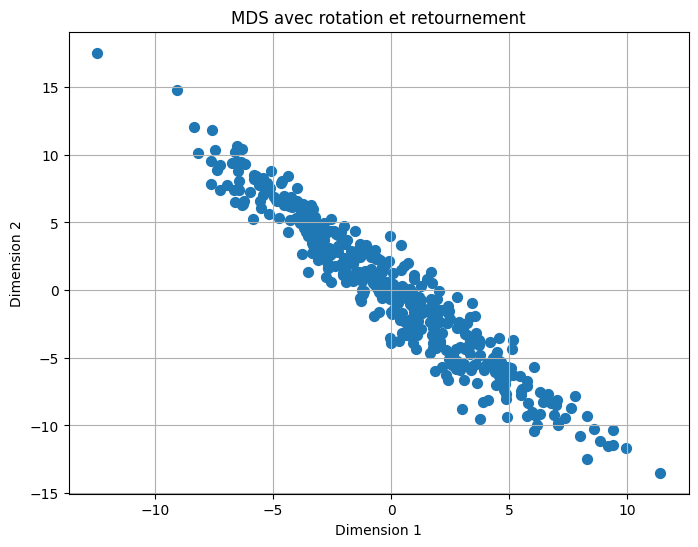

In [132]:
X_mds = apply_mds(D)
X_mds_rotated = rotate_and_flip(X_mds)
plot_2d(X_mds_rotated, "MDS avec rotation et retournement")
    

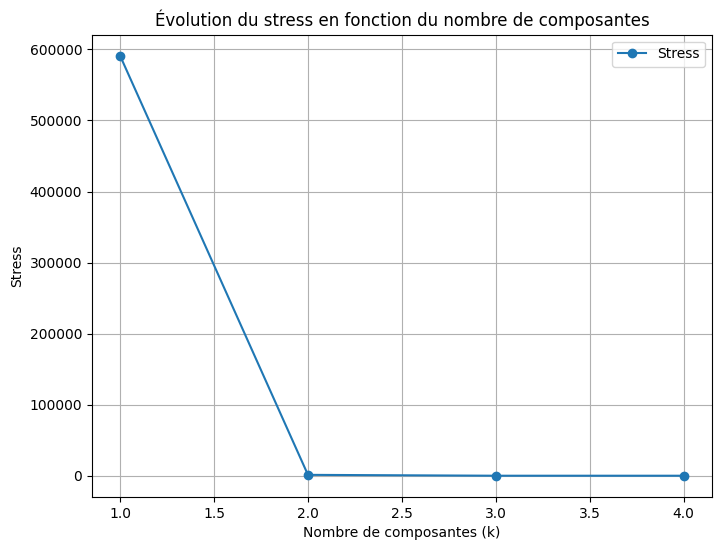

In [133]:
k_range = range(1, min(5, D.shape[0] - 1))
stress = compute_stress_for_k(D, k_range)
plot_stress(k_range, stress)
    

### ISOMAP

Isomap est une méthode de réduction de dimensionnalité non linéaire qui combine une procédure de calcul de la matrice de distance avec MDS. Le calcul des distances est basé sur les distances géodésiques évaluées sur le graphique de voisinage

Isomap, LLE et les variantes sont les mieux adaptées pour déplier un seul collecteur continu de faible dimension

In [134]:
def apply_isomap(data, n_neighbors=10, n_components=2):
    """Applique Isomap sur les données."""
    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    return isomap.fit_transform(data)


In [135]:
X_isomap = apply_isomap(rois_to_reduce_dimension)


### TSNE

t-SNE se concentrera sur la structure locale des données et aura tendance à extraire des groupes locaux d’échantillons groupés. Nous cherchons justement le groupe local où il y aurait de l'atrophie. C'est la méthode retenue.

SI t-SNE est utilisé à partir de bibliothèques comme sklearn, alors il n'est pas nécessaire de construire manuellement les probabilités gaussiennes entre les paires. Cela est géré automatiquement par l'algorithme


In [136]:
def apply_tsne(data, n_components=2, perplexity=30, random_state=0):
    """Applique t-SNE sur les données."""
    tsne = TSNE(n_components=n_components, init='pca', random_state=random_state, perplexity=perplexity)
    return tsne.fit_transform(data)

In [137]:
try:
     X_tsne = apply_tsne(rois_to_reduce_dimension)
except KeyboardInterrupt:
    print("t-SNE interrompu automatiquement.")
    X_tsne = None
    

### Comparaison 

In [138]:
def plot_comparison(data_list, titles, colors=None):
    """Trace plusieurs projections en parallèle pour comparaison."""
    fig, axes = plt.subplots(1, len(data_list), figsize=(15, 5))
    for i, data in enumerate(data_list):
        axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("Dimension 1")
        axes[i].set_ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_109356\594510362.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)


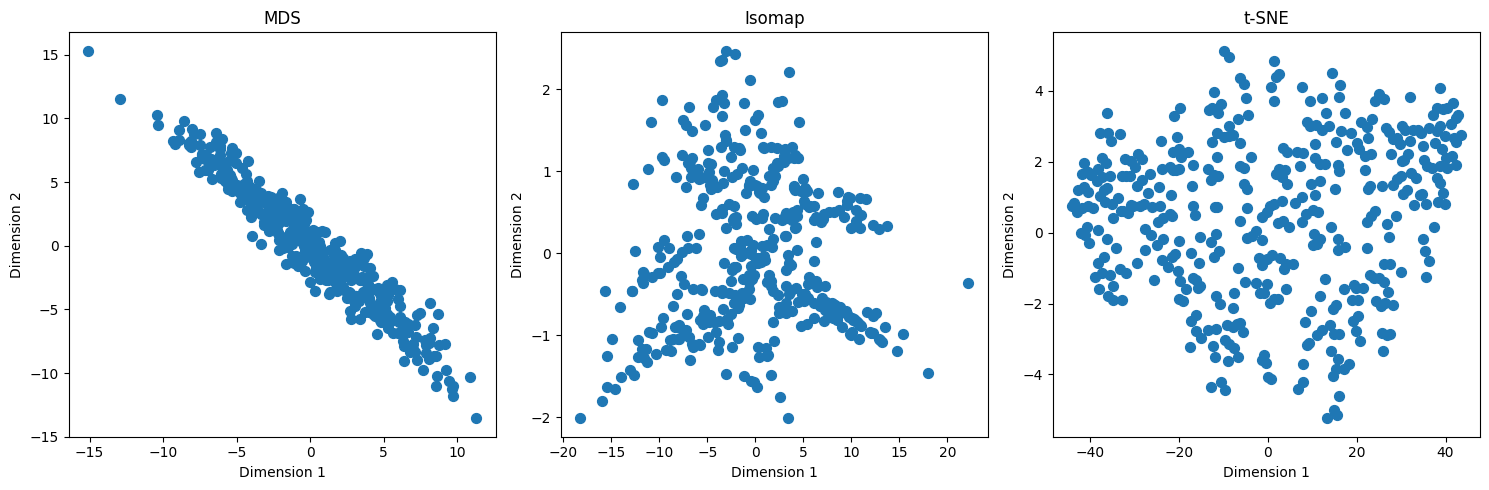

In [139]:
if X_tsne is not None:
        plot_comparison([X_mds, X_isomap, X_tsne], ["MDS", "Isomap", "t-SNE"])
else:
        plot_comparison([X_mds, X_isomap], ["MDS", "Isomap"])

t-SNE se concentrera sur la structure locale des données et aura tendance à extraire des groupes locaux d’échantillons groupés. Nous cherchons justement le groupe local où il y aurait de l'atrophie. C'est la méthode retenue.

# Traitement table

## Répartition des colonnes

In [14]:
# Indices des colonnes par groupes de régions cérébrales

# 1. Variables liées à l'identification des participants et sessions
identification_columns = [0, 1, 2]
# 2. Variables Frontal (Fro)
frontal_columns_gm = [15, 16, 17, 18]
frontal_columns_csf = [90, 91, 92, 93]
frontal_columns_wm = [180, 181, 182, 183]
# 3. Variables Temporal (Tem)
temporal_columns_gm = [19, 20, 21, 22]
temporal_columns_csf = [94, 95, 96, 97]
temporal_columns_wm = [184, 185, 186, 187]
# 4. Variables Occipital (Occ)
occipital_columns_gm = [23, 24, 25, 26]
occipital_columns_csf = [98, 99, 100, 101]
occipital_columns_wm = [188, 189, 190, 191]
# 5. Variables Parietal (Par)
parietal_columns_gm = [27, 28, 29, 30]
parietal_columns_csf = [102, 103, 104, 105]
parietal_columns_wm = [192, 193, 194, 195]
# 6. Variables Cerebellum (Cbe)
cerebellum_columns_gm = [31, 32, 33, 34]
cerebellum_columns_csf = [106, 107, 108, 109]
cerebellum_columns_wm = [196, 197, 198, 199]
# 7. Variables Subcortical (Sub)
subcortical_columns_gm = [35, 36, 37, 38, 39, 40]
subcortical_columns_csf = [110, 111, 112, 113, 114, 115]
subcortical_columns_wm = [200, 201, 202, 203, 204, 205]
# 8. Variables Thalamus
thalamus_columns_gm = [41, 42]
thalamus_columns_csf = [116, 117]
thalamus_columns_wm = [206, 207]
# 9. Variables Lingual
lingual_columns_gm = [43, 44]
lingual_columns_csf = [118, 119]
lingual_columns_wm = [208, 209]

brain_regions_indices = {
    "identification": identification_columns,
    "frontal_gm": frontal_columns_gm,
    "frontal_csf": frontal_columns_csf,
    "frontal_wm": frontal_columns_wm,
    "temporal_gm": temporal_columns_gm,
    "temporal_csf": temporal_columns_csf,
    "temporal_wm": temporal_columns_wm,
    "occipital_gm": occipital_columns_gm,
    "occipital_csf": occipital_columns_csf,
    "occipital_wm": occipital_columns_wm,
    "parietal_gm": parietal_columns_gm,
    "parietal_csf": parietal_columns_csf,
    "parietal_wm": parietal_columns_wm,
    "cerebellum_gm": cerebellum_columns_gm,
    "cerebellum_csf": cerebellum_columns_csf,
    "cerebellum_wm": cerebellum_columns_wm,
    "subcortical_gm": subcortical_columns_gm,
    "subcortical_csf": subcortical_columns_csf,
    "subcortical_wm": subcortical_columns_wm,
    "thalamus_gm": thalamus_columns_gm,
    "thalamus_csf": thalamus_columns_csf,
    "thalamus_wm": thalamus_columns_wm,
    "lingual_gm": lingual_columns_gm,
    "lingual_csf": lingual_columns_csf,
    "lingual_wm": lingual_columns_wm,
}


## Application de la réduction de dimension

In [153]:
def apply_tsne(data, n_components=2, perplexity=30, random_state=0):
    """Applique t-SNE sur les données."""
    tsne = TSNE(n_components=n_components, init='pca', random_state=random_state, perplexity=perplexity)
    return tsne.fit_transform(data)


In [ ]:

IRM_reduced = pd.DataFrame()  # DataFrame final pour stocker les données réduites
for region, indices in brain_regions_indices.items():
    if region != "identification":  # Ignorer la catégorie "identification"
        print(f"Réduction de la dimension pour {region}...")
        # Extraire les colonnes correspondant à la région
        region_data = rois.iloc[:, indices]
        
        try:
            # Appliquer t-SNE pour réduire à 2 dimensions
            tsne_result = apply_tsne(region_data)
            
            # Ajouter les résultats réduits avec un préfixe au DataFrame final
            IRM_reduced[[f"{region}_dim1", f"{region}_dim2"]] = pd.DataFrame(tsne_result)
        except KeyboardInterrupt:
            print(f"Réduction interrompue pour {region}.")
            continue

# Ajouter les colonnes "identification" (sans réduction)
identification_data = rois.iloc[:, brain_regions_indices["identification"]]
set = rois.iloc[:, 291]
IRM_reduced = pd.concat([identification_data.reset_index(drop=True), IRM_reduced], axis=1)
rois_reduced = pd.concat([IRM_reduced, set.reset_index(drop=True)], axis=1)
rois_reduced = rois_reduced.drop(columns=["thalamus_gm_dim2"], axis=1)


In [161]:

# rois_to_reduce_dimension = rois.drop(columns=["set"], axis=1).loc[:, 'l3thVen_GM_Vol':]
# try:
#      X_tsne = apply_tsne(rois_to_reduce_dimension)
# except KeyboardInterrupt:
#     print("t-SNE interrompu automatiquement.")
#     X_tsne = None
    
# IRM_reduced = pd.DataFrame(X_tsne, columns=['IRM_1', 'IRM_2'], index=rois_to_reduce_dimension.index)

# columns_to_remove = rois.drop(columns=["set"], axis=1).loc[:, 'l3thVen_GM_Vol':].columns
# rois_reduced = rois.drop(columns=columns_to_remove, axis=1)


In [21]:
def apply_tsne(data, n_components=2, perplexity=30, random_state=0):
    """Applique t-SNE sur les données."""
    tsne = TSNE(n_components=n_components, init='pca', random_state=random_state, perplexity=perplexity)
    return tsne.fit_transform(data)

rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" ))
rois_train["set"] = 'train'
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" ))
rois_test["set"] = 'test'
rois = pd.concat([rois_train, rois_test])
# ________________________________________Indices des colonnes par groupes de régions cérébrales_________________________________________________________
# 1. Variables liées à l'identification des participants et sessions
identification_columns = [0, 1, 2]
# 2. Variables Frontal (Fro)
frontal_columns_gm = [15, 16, 17, 18]
frontal_columns_csf = [90, 91, 92, 93]
frontal_columns_wm = [180, 181, 182, 183]
# 3. Variables Temporal (Tem)
temporal_columns_gm = [19, 20, 21, 22]
temporal_columns_csf = [94, 95, 96, 97]
temporal_columns_wm = [184, 185, 186, 187]
# 4. Variables Occipital (Occ)
occipital_columns_gm = [23, 24, 25, 26]
occipital_columns_csf = [98, 99, 100, 101]
occipital_columns_wm = [188, 189, 190, 191]
# 5. Variables Parietal (Par)
parietal_columns_gm = [27, 28, 29, 30]
parietal_columns_csf = [102, 103, 104, 105]
parietal_columns_wm = [192, 193, 194, 195]
# 6. Variables Cerebellum (Cbe)
cerebellum_columns_gm = [31, 32, 33, 34]
cerebellum_columns_csf = [106, 107, 108, 109]
cerebellum_columns_wm = [196, 197, 198, 199]
# 7. Variables Subcortical (Sub)
subcortical_columns_gm = [35, 36, 37, 38, 39, 40]
subcortical_columns_csf = [110, 111, 112, 113, 114, 115]
subcortical_columns_wm = [200, 201, 202, 203, 204, 205]
# 8. Variables Thalamus
thalamus_columns_gm = [41, 42]
thalamus_columns_csf = [116, 117]
thalamus_columns_wm = [206, 207]
# 9. Variables Lingual
lingual_columns_gm = [43, 44]
lingual_columns_csf = [118, 119]
lingual_columns_wm = [208, 209]

brain_regions_indices = {
    "identification": identification_columns,
    "frontal_gm": frontal_columns_gm,
    "frontal_csf": frontal_columns_csf,
    "frontal_wm": frontal_columns_wm,
    "temporal_gm": temporal_columns_gm,
    "temporal_csf": temporal_columns_csf,
    "temporal_wm": temporal_columns_wm,
    "occipital_gm": occipital_columns_gm,
    "occipital_csf": occipital_columns_csf,
    "occipital_wm": occipital_columns_wm,
    "parietal_gm": parietal_columns_gm,
    "parietal_csf": parietal_columns_csf,
    "parietal_wm": parietal_columns_wm,
    "cerebellum_gm": cerebellum_columns_gm,
    "cerebellum_csf": cerebellum_columns_csf,
    "cerebellum_wm": cerebellum_columns_wm,
    "subcortical_gm": subcortical_columns_gm,
    "subcortical_csf": subcortical_columns_csf,
    "subcortical_wm": subcortical_columns_wm,
    "thalamus_gm": thalamus_columns_gm,
    "thalamus_csf": thalamus_columns_csf,
    "thalamus_wm": thalamus_columns_wm,
    "lingual_gm": lingual_columns_gm,
    "lingual_csf": lingual_columns_csf,
    "lingual_wm": lingual_columns_wm,
}

#____________________________________________________________réduction de dimension pour chaque partie du cerveaux__________________________________
IRM_reduced = pd.DataFrame()  # DataFrame final pour stocker les données réduites
for region, indices in brain_regions_indices.items():
    if region != "identification":  # Ignorer la catégorie "identification"
        print(f"Réduction de la dimension pour {region}...")
        # Extraire les colonnes correspondant à la région
        region_data = rois.iloc[:, indices]
        
        try:
            # Appliquer t-SNE pour réduire à 2 dimensions
            tsne_result = apply_tsne(region_data)
            
            # Ajouter les résultats réduits avec un préfixe au DataFrame final
            IRM_reduced[[f"{region}_dim1", f"{region}_dim2"]] = pd.DataFrame(tsne_result)
        except KeyboardInterrupt:
            print(f"Réduction interrompue pour {region}.")
            continue

# Ajouter les colonnes "identification" (sans réduction)
identification_data = rois.iloc[:, brain_regions_indices["identification"]]
set = rois.iloc[:, 291]
IRM_reduced = pd.concat([identification_data.reset_index(drop=True), IRM_reduced], axis=1)
rois_reduced = pd.concat([IRM_reduced, set.reset_index(drop=True)], axis=1)
rois_reduced = rois_reduced.drop(columns=["thalamus_gm_dim2"], axis=1)


Réduction de la dimension pour frontal_gm...
Réduction de la dimension pour frontal_csf...
Réduction de la dimension pour frontal_wm...
Réduction de la dimension pour temporal_gm...
Réduction de la dimension pour temporal_csf...
Réduction de la dimension pour temporal_wm...
Réduction de la dimension pour occipital_gm...
Réduction de la dimension pour occipital_csf...
Réduction de la dimension pour occipital_wm...
Réduction de la dimension pour parietal_gm...
Réduction de la dimension pour parietal_csf...
Réduction de la dimension pour parietal_wm...
Réduction de la dimension pour cerebellum_gm...
Réduction de la dimension pour cerebellum_csf...
Réduction de la dimension pour cerebellum_wm...
Réduction de la dimension pour subcortical_gm...
Réduction de la dimension pour subcortical_csf...
Réduction de la dimension pour subcortical_wm...
Réduction de la dimension pour thalamus_gm...
Réduction de la dimension pour thalamus_csf...
Réduction de la dimension pour thalamus_wm...
Réduction de

## code complet pour submit 

In [ ]:
# import pandas as pd
# import os
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.manifold import TSNE
# from sklearn.pipeline import make_pipeline
# from sklearn.neural_network import MLPClassifier

# class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
#     """Transformer pour sélectionner uniquement les colonnes de caractéristiques des régions cérébrales (ROIs)."""
    
#     def __init__(self, brain_regions_indices, tsne_params=None):
#         """
#         brain_regions_indices: dict
#             Dictionnaire avec les indices des colonnes pour chaque région cérébrale.
#         tsne_params: dict, optional
#             Paramètres pour l'algorithme t-SNE.
#         """
#         self.brain_regions_indices = brain_regions_indices
#         self.tsne_params = tsne_params if tsne_params is not None else {
#             'n_components': 2,
#             'perplexity': 30,
#             'random_state': 0,
#             'init': 'pca'
#         }

#     def fit(self, X, y=None):
#         """Rien à ajuster dans ce cas."""
#         return self

#     def transform(self, X):
#         """
#         Réduction des dimensions des régions cérébrales avec t-SNE et conservation des colonnes d'identification.
        
#         X : DataFrame
#             Les données originales avec toutes les colonnes.
#         Returns : DataFrame
#             Les données réduites à 2 dimensions pour chaque région, ainsi que les colonnes d'identification.
#         """
#         IRM_reduced = pd.DataFrame()
        
#         for region, indices in self.brain_regions_indices.items():
#             if region != "identification":  # Ignorer la catégorie "identification"
#                 print(f"Réduction de la dimension pour {region}...")
#                 # Extraire les colonnes correspondant à la région
#                 region_data = X.iloc[:, indices]
                
#                 try:
#                     # Appliquer t-SNE pour réduire à 2 dimensions
#                     tsne = TSNE(**self.tsne_params)
#                     tsne_result = tsne.fit_transform(region_data)
                    
#                     # Ajouter les résultats réduits avec un préfixe au DataFrame final
#                     IRM_reduced[[f"{region}_dim1", f"{region}_dim2"]] = pd.DataFrame(tsne_result)
#                 except KeyboardInterrupt:
#                     print(f"Réduction interrompue pour {region}.")
#                     continue

#         # Ajouter les colonnes "identification" (sans réduction)
#         identification_data = X.iloc[:, self.brain_regions_indices["identification"]]
#         IRM_reduced = pd.concat([identification_data.reset_index(drop=True), IRM_reduced], axis=1)
#         set = rois.iloc[:, 291]
#         IRM_reduced = pd.concat([identification_data.reset_index(drop=True), IRM_reduced], axis=1)
#         IRM_reduced = pd.concat([IRM_reduced, set.reset_index(drop=True)], axis=1)
#         return IRM_reduced

# def get_estimator(brain_regions_indices, tsne_params=None):
#     """
#     Construire un pipeline complet pour le modèle.
    
#     brain_regions_indices: dict
#         Dictionnaire des indices des colonnes par région cérébrale.
#     tsne_params: dict, optional
#         Paramètres pour l'algorithme t-SNE.
#     """
#     estimator = make_pipeline(
#         ROIsFeatureExtractor(brain_regions_indices=brain_regions_indices, tsne_params=tsne_params),
#         MLPClassifier(random_state=1,
#                       hidden_layer_sizes=(200, 150, 100, 50, 25))
#     )
#     return estimator

# identification_columns = [0, 1, 2, 3]
# # 2. Variables Frontal (Fro)
# frontal_columns_gm = [15, 16, 17, 18]
# frontal_columns_csf = [90, 91, 92, 93]
# frontal_columns_wm = [180, 181, 182, 183]
# # 3. Variables Temporal (Tem)
# temporal_columns_gm = [19, 20, 21, 22]
# temporal_columns_csf = [94, 95, 96, 97]
# temporal_columns_wm = [184, 185, 186, 187]
# # 4. Variables Occipital (Occ)
# occipital_columns_gm = [23, 24, 25, 26]
# occipital_columns_csf = [98, 99, 100, 101]
# occipital_columns_wm = [188, 189, 190, 191]
# # 5. Variables Parietal (Par)
# parietal_columns_gm = [27, 28, 29, 30]
# parietal_columns_csf = [102, 103, 104, 105]
# parietal_columns_wm = [192, 193, 194, 195]
# # 6. Variables Cerebellum (Cbe)
# cerebellum_columns_gm = [31, 32, 33, 34]
# cerebellum_columns_csf = [106, 107, 108, 109]
# cerebellum_columns_wm = [196, 197, 198, 199]
# # 7. Variables Subcortical (Sub)
# subcortical_columns_gm = [35, 36, 37, 38, 39, 40]
# subcortical_columns_csf = [110, 111, 112, 113, 114, 115]
# subcortical_columns_wm = [200, 201, 202, 203, 204, 205]
# # 8. Variables Thalamus
# thalamus_columns_gm = [41, 42]
# thalamus_columns_csf = [116, 117]
# thalamus_columns_wm = [206, 207]
# # 9. Variables Lingual
# lingual_columns_gm = [43, 44]
# lingual_columns_csf = [118, 119]
# lingual_columns_wm = [208, 209]

# brain_regions_indices = {
#     "identification": identification_columns,
#     "frontal_gm": frontal_columns_gm,
#     "frontal_csf": frontal_columns_csf,
#     "frontal_wm": frontal_columns_wm,
#     "temporal_gm": temporal_columns_gm,
#     "temporal_csf": temporal_columns_csf,
#     "temporal_wm": temporal_columns_wm,
#     "occipital_gm": occipital_columns_gm,
#     "occipital_csf": occipital_columns_csf,
#     "occipital_wm": occipital_columns_wm,
#     "parietal_gm": parietal_columns_gm,
#     "parietal_csf": parietal_columns_csf,
#     "parietal_wm": parietal_columns_wm,
#     "cerebellum_gm": cerebellum_columns_gm,
#     "cerebellum_csf": cerebellum_columns_csf,
#     "cerebellum_wm": cerebellum_columns_wm,
#     "subcortical_gm": subcortical_columns_gm,
#     "subcortical_csf": subcortical_columns_csf,
#     "subcortical_wm": subcortical_columns_wm,
#     "thalamus_gm": thalamus_columns_gm,
#     "thalamus_csf": thalamus_columns_csf,
#     "thalamus_wm": thalamus_columns_wm,
#     "lingual_gm": lingual_columns_gm,
#     "lingual_csf": lingual_columns_csf,
#     "lingual_wm": lingual_columns_wm,
# }


Objectif : créer un indice du nombre de partie du cerveau particulièrements atrophiés

## Traitements préliminaires pour la prévision

1. suprimer variable "session", "study", "participant_id"
2. créer variable adolescent et jeune adulte 
3. Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
4. Encodage de "site" en variables indicatrices (dummy variables)


In [57]:

# Supprimer les colonnes "session", "study", "participant_id"
participants_traitee= participants.drop(columns=["session", "study","TIV",	"CSF_Vol"	,"GM_Vol",	"WM_Vol"])

# Créer une nouvelle colonne binaire pour les adolescents et jeunes adultes
participants_traitee["young_adult"] = participants_traitee["age"].apply(lambda x: 1 if x <= 25 and  x >= 18 else 0)
participants_traitee["adolescent"] = participants_traitee["age"].apply(lambda x: 1 if x < 18 and  x >= 10 else 0)

# Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
participants_traitee["schizophrenia"] = participants_traitee["diagnosis"].apply(lambda x: 1 if x == "schizophrenia" else 0)
participants_traitee= participants_traitee.drop(columns=["diagnosis"])

#Encodage de "site" en variables indicatrices (dummy variables)
participants_traitee = pd.get_dummies(participants_traitee, columns=["site"], drop_first=True)
participants_traitee["site_NU"] = participants_traitee["site_NU"].astype(int)
participants_traitee["site_WUSTL"] = participants_traitee["site_WUSTL"].astype(int)


print(participants_traitee.head())

  participant_id  sex   age    set  young_adult  adolescent  schizophrenia  \
0        CH7098a  0.0  20.0  train            1           0              1   
1      A00024535  0.0  26.0  train            0           0              0   
2         CC7563  1.0  28.0  train            0           0              0   
3         CC3945  1.0  21.0  train            1           0              0   
4        CH8853b  1.0  21.0  train            1           0              0   

   site_NU  site_WUSTL  
0        1           0  
1        0           0  
2        0           1  
3        0           1  
4        1           0  


In [35]:
rois_with_IRM_reduced = rois_reduced
rois_with_IRM_reduced_traitee= rois_with_IRM_reduced.drop(columns=["set", "session","run"])
print(rois_with_IRM_reduced_traitee.head())

  participant_id  frontal_gm_dim1  frontal_gm_dim2  frontal_csf_dim1  \
0        CH7098a        38.298164        -1.529838         20.696939   
1      A00024535        13.724403        13.129539         20.124079   
2         CC7563        30.243343        -3.307753         16.484634   
3         CC3945        15.350575        -0.957024        -25.351254   
4        CH8853b        36.932430        -2.029226         17.261879   

   frontal_csf_dim2  frontal_wm_dim1  frontal_wm_dim2  temporal_gm_dim1  \
0         -2.957056        42.292095         0.576711         44.104237   
1         -2.226595        30.734072        -3.428355         29.543108   
2          6.406806       -30.773031         4.619562         23.543610   
3          4.133693       -35.645569         0.968394        -44.689079   
4          5.692729         9.024591        -3.656349         27.622694   

   temporal_gm_dim2  temporal_csf_dim1  temporal_csf_dim2  temporal_wm_dim1  \
0         -2.257949          27.86207

## Ajout des informations traitees des IRM (rois) à la table des participants

In [64]:
# Fusionner les DataFrames participants_traitee et rois_with_IRM_reduced_and_flags sur 'participant_id' avec un merge à gauche
participants_enrichi_with_rois_traitee = pd.merge(participants_traitee, rois_with_IRM_reduced_traitee, on='participant_id', how='left')

assert participants_enrichi_with_rois_traitee.shape[0]==513


In [ ]:
participants_enrichi_with_rois_traitee = participants_enrichi_with_rois_traitee.drop(columns=["participant_id"],axis=1)

## train et test

In [66]:
# Diviser les données en train et test selon la variable "set"
train_data = participants_enrichi_with_rois_traitee[participants_enrichi_with_rois_traitee["set"] == "train"] 
test_data = participants_enrichi_with_rois_traitee[participants_enrichi_with_rois_traitee["set"] == "test"]

# Définir les variables explicatives (X) et la cible (y)
X_train = train_data.drop(columns=["schizophrenia", "set"])  # Supprimez la cible et la colonne "set"
y_train = train_data["schizophrenia"]

X_test = test_data.drop(columns=["schizophrenia", "set"])
y_test = test_data["schizophrenia"]


In [61]:
X_train

,sex,age,young_adult,adolescent,site_NU,site_WUSTL,frontal_gm_dim1,frontal_gm_dim2,frontal_csf_dim1,frontal_csf_dim2,frontal_wm_dim1,frontal_wm_dim2,temporal_gm_dim1,temporal_gm_dim2,temporal_csf_dim1,temporal_csf_dim2,temporal_wm_dim1,temporal_wm_dim2,occipital_gm_dim1,occipital_gm_dim2,occipital_csf_dim1,occipital_csf_dim2,occipital_wm_dim1,occipital_wm_dim2,parietal_gm_dim1,parietal_gm_dim2,parietal_csf_dim1,parietal_csf_dim2,parietal_wm_dim1,parietal_wm_dim2,cerebellum_gm_dim1,cerebellum_gm_dim2,cerebellum_csf_dim1,cerebellum_csf_dim2,cerebellum_wm_dim1,cerebellum_wm_dim2,subcortical_gm_dim1,subcortical_gm_dim2,subcortical_csf_dim1,subcortical_csf_dim2,subcortical_wm_dim1,subcortical_wm_dim2,thalamus_gm_dim1,thalamus_gm_dim2,thalamus_csf_dim1,thalamus_csf_dim2,thalamus_wm_dim1,thalamus_wm_dim2,lingual_gm_dim1,lingual_gm_dim2,lingual_csf_dim1,lingual_csf_dim2,lingual_wm_dim1,lingual_wm_dim2
0,0.0,20.0,1,0,1,0,38.298164,-1.529838,20.696939,-2.957056,42.292095,0.576711,44.104237,-2.257949,27.862072,2.569267,32.765751,-5.300514,43.282200,2.790766,36.348183,0.533895,1.124161,17.675053,38.013771,1.621404,33.549446,-5.223119,41.000404,7.475445,26.557070,6.138250,35.351990,8.817346,34.954124,-0.529386,30.246487,9.104910,46.831783,1.143531,33.217884,3.285969,48.122093,0.0,9.517877,-11.571508,30.728613,0.456289,11.864771,4.704446,27.095026,6.461106,32.336433,1.726238
1,0.0,26.0,0,0,0,0,13.724403,13.129539,20.124079,-2.226595,30.734072,-3.428355,29.543108,-2.654655,30.245975,1.571135,5.796717,-2.696533,-15.373422,4.921655,24.894630,2.514217,1.065186,13.183057,24.045195,6.543498,32.216187,4.414221,37.246872,3.372051,-7.377513,7.703052,26.389669,4.070446,36.593220,-0.703765,-24.567053,1.246794,40.332298,-3.039056,31.774275,2.397611,46.662766,0.0,34.491825,-1.579954,21.344002,-3.067957,-9.854099,-5.289002,41.342934,-0.598066,28.096478,5.887417
2,1.0,28.0,0,0,0,1,30.243343,-3.307753,16.484634,6.406806,-30.773031,4.619562,23.543610,-2.588936,-11.340525,0.617063,6.489924,2.281787,33.033749,-0.959828,17.849508,-1.248222,4.389584,-10.397966,30.129200,-2.075480,-12.299739,-11.871248,-40.855335,-1.107700,0.220088,-10.821163,5.607868,9.776882,-36.549450,-0.370683,27.632341,9.818358,16.048656,-4.713100,-30.460169,1.576518,30.801468,0.0,8.966023,0.823500,-14.078623,-12.421524,7.436114,7.242241,-5.448021,5.275091,-24.045654,-11.784561
3,1.0,21.0,1,0,0,1,15.350575,-0.957024,-25.351254,4.133693,-35.645569,0.968394,-44.689079,-1.722234,1.949119,1.171346,-42.418297,1.187343,-13.984030,-1.757491,-22.695911,5.392210,-22.621721,-9.538072,-38.112900,3.879823,-23.131014,-5.355669,-8.555572,7.978119,3.010590,11.058371,-3.854406,-12.727186,-38.160633,-7.162134,0.797169,2.767552,-35.570225,2.823978,-36.797825,-0.875168,-34.696758,0.0,-12.874419,1.968688,-29.649366,3.172486,-23.812769,2.609802,-32.291824,-0.667693,-29.511990,9.859718
4,1.0,21.0,1,0,1,0,36.932430,-2.029226,17.261879,5.692729,9.024591,-3.656349,27.622694,-0.049286,11.655353,-4.756162,7.706873,-1.066385,33.534859,3.172015,25.851149,-2.704077,18.962681,7.041589,40.133110,1.533709,31.268520,-4.891563,1.330682,6.222723,26.664436,2.052014,31.774918,7.123981,14.092730,5.904766,23.159340,2.779140,36.473480,1.045030,10.661850,-1.684177,-11.887667,0.0,32.467819,-2.741496,22.693998,-6.427906,-8.203269,-0.686025,24.247147,0.193958,9.860436,-6.824478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.0,23.0,1,0,0,1,2.784622,2.341074,-32.398129,8.509189,-19.666121,0.568812,-50.290337,-0.638083,-34.027760,-2.182262,-26.249323,0.888768,-15.317030,-3.673347,-33.771000,4.344074,-9.671689,-3.989480,-30.601307,-1.500695,-31.176258,-1.910130,-27.291571,-0.789458,-9.739195,0.193866,-0.301047,-9.343998,-28.253786,3.002930,-5.473408,-0.279802,-37.231243,1.698014,-15.676309,4.736374,4.731499,0.0,-13.326628,-9.782620,-13.644192,-14.675202,-43.59830

# Modélisation

## Modèle Base line

In [67]:
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.443262
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          schizophrenia   No. Observations:                  410
Model:                          Logit   Df Residuals:                      356
Method:                           MLE   Df Model:                           53
Date:                Sat, 11 Jan 2025   Pseudo R-squ.:                  0.3573
Time:                        13:07:38   Log-Likelihood:                -181.74
converged:                       True   LL-Null:                       -282.78
Covariance Type:            nonrobust   LLR p-value:                 2.893e-19
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6584      1.126      1.473      0.141      -0.549       3.865

In [68]:

# Initialiser et entraîner le modèle
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=0.1)  # L2 est le défaut
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  

In [70]:
# Afficher les coefficients du modèle
coefficients = model.coef_[0]  
variables = X_train.columns  

coef_df = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df)


                Variable  Coefficient  Abs_Coefficient
0                    sex    -0.312968         0.312968
3             adolescent    -0.155097         0.155097
2            young_adult     0.132151         0.132151
17      temporal_wm_dim2    -0.104009         0.104009
31    cerebellum_gm_dim2     0.065394         0.065394
25      parietal_gm_dim2     0.055903         0.055903
44     thalamus_csf_dim2    -0.050669         0.050669
15     temporal_csf_dim2     0.048620         0.048620
11       frontal_wm_dim2     0.047578         0.047578
52       lingual_wm_dim2     0.044914         0.044914
46      thalamus_wm_dim2     0.044651         0.044651
5             site_WUSTL    -0.040933         0.040933
28      parietal_wm_dim1     0.039948         0.039948
45      thalamus_wm_dim1     0.038720         0.038720
37   subcortical_gm_dim2     0.038408         0.038408
48       lingual_gm_dim2     0.037187         0.037187
1                    age    -0.033447         0.033447
30    cere

In [71]:
# Métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba))
print(f"RMSE : {rmse:.4f}")

precision = precision_score(y_test, model.predict(X_test))
print(f"Precision : {precision:.4f}")


recall = recall_score(y_test, model.predict(X_test))
print(f"Recall : {recall:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC : {auc:.4f}")



RMSE : 0.4424
Precision : 0.6531
Recall : 0.6667
AUC : 0.7742
